# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 12

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [96]:
train = pd.read_csv("train.csv")
train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [97]:
train.drop(columns=['dropoff_datetime'], inplace=True)
train.head()

id  vendor_id      pickup_datetime  passenger_count  \
0  id2875421          2  2016-03-14 17:24:55                1   
1  id2377394          1  2016-06-12 00:43:35                1   
2  id3858529          2  2016-01-19 11:35:24                1   
3  id3504673          2  2016-04-06 19:32:31                1   
4  id2181028          2  2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [98]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'])

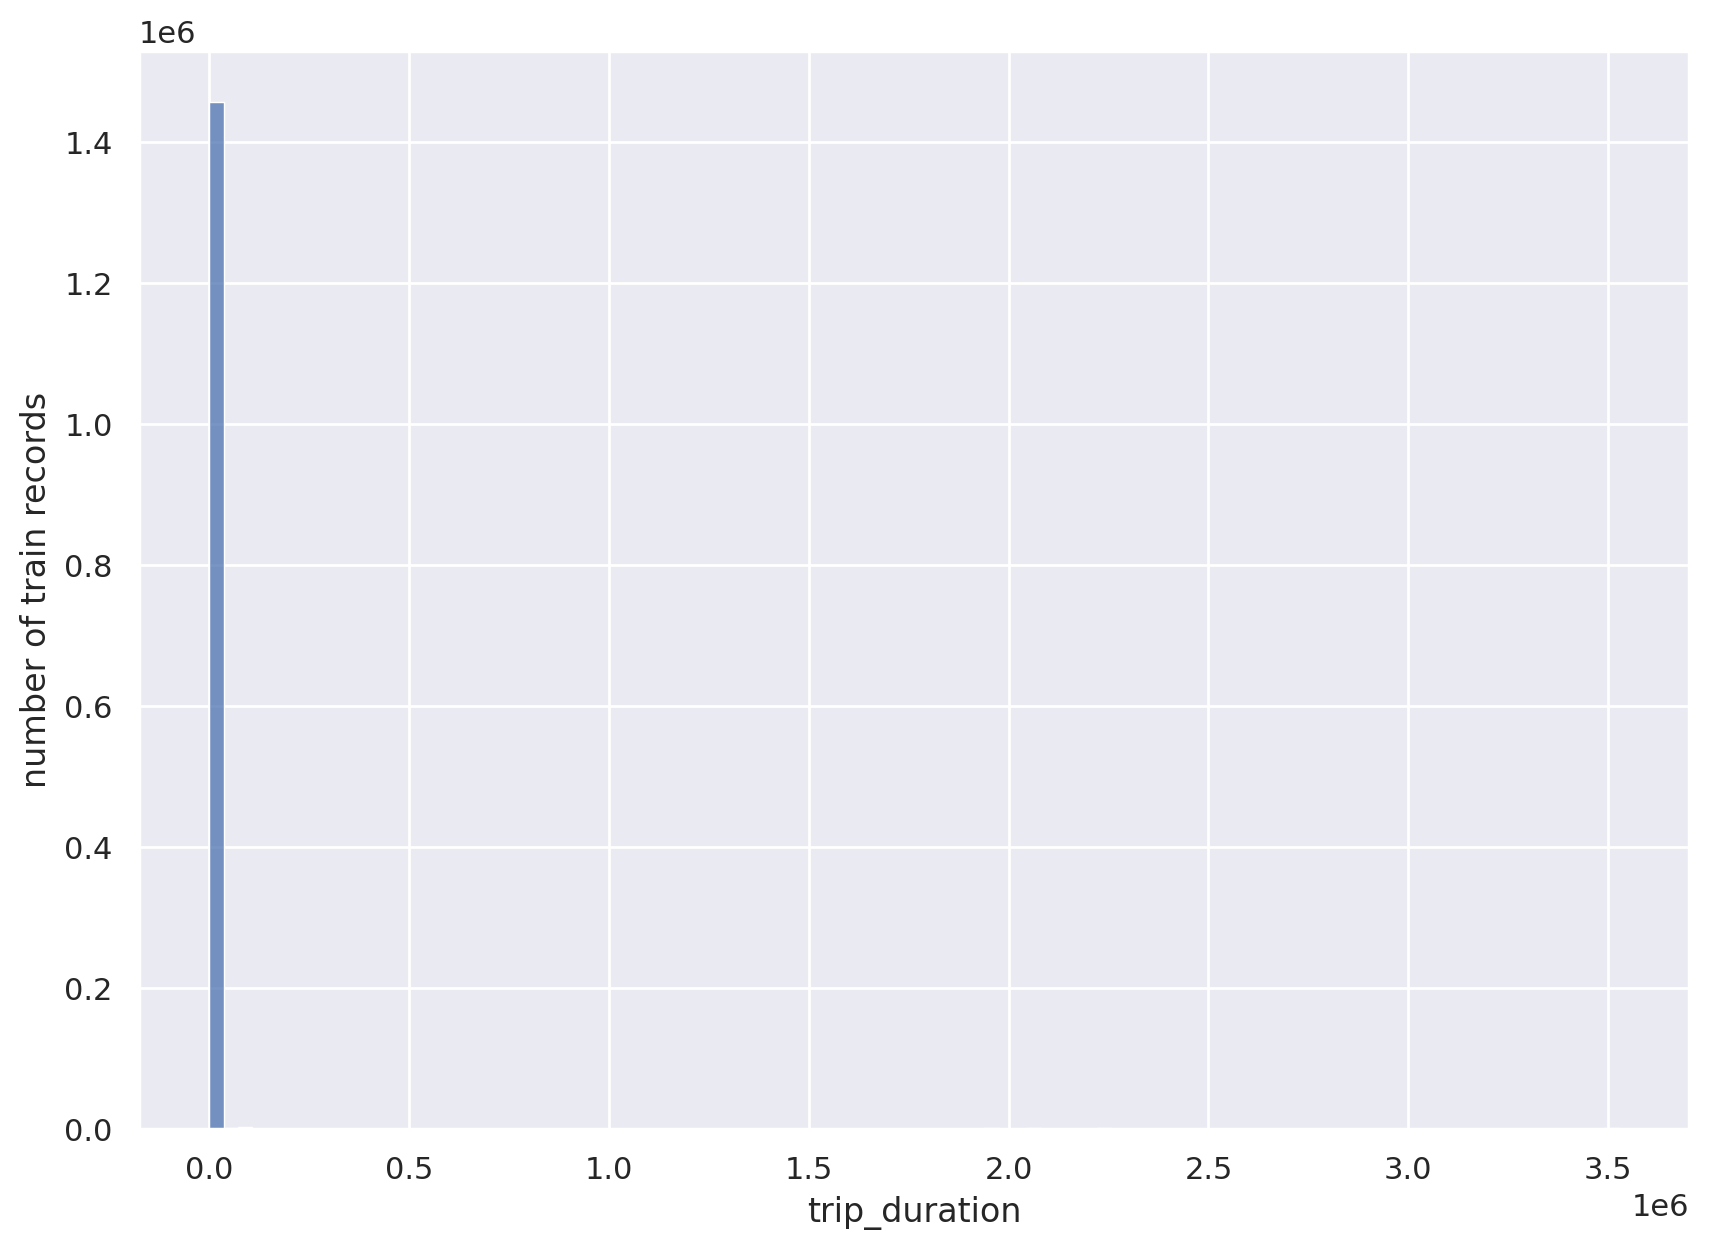

In [99]:
sns.histplot(train['trip_duration'], bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

In [100]:
train['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?
**Большинство значений находится около 10^3**

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

 Значение целевой переменной довольно большие, поэтому можно использовать log, чтобы сравнивать порядки + вроде менее чувствительна к выбросам

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.


**Доказательство**: $$\text{RMSLE}(X, y, a) = \text{RMSE}(X, \log{y + 1}, \log{a + 1}) = \sqrt{\text{MSE}(X, \log{y + 1}, \log{a + 1})}$$ поскольку log и sqrt монотонные функции

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [101]:
train['log_trip_duration'] = np.log1p(train['trip_duration'])

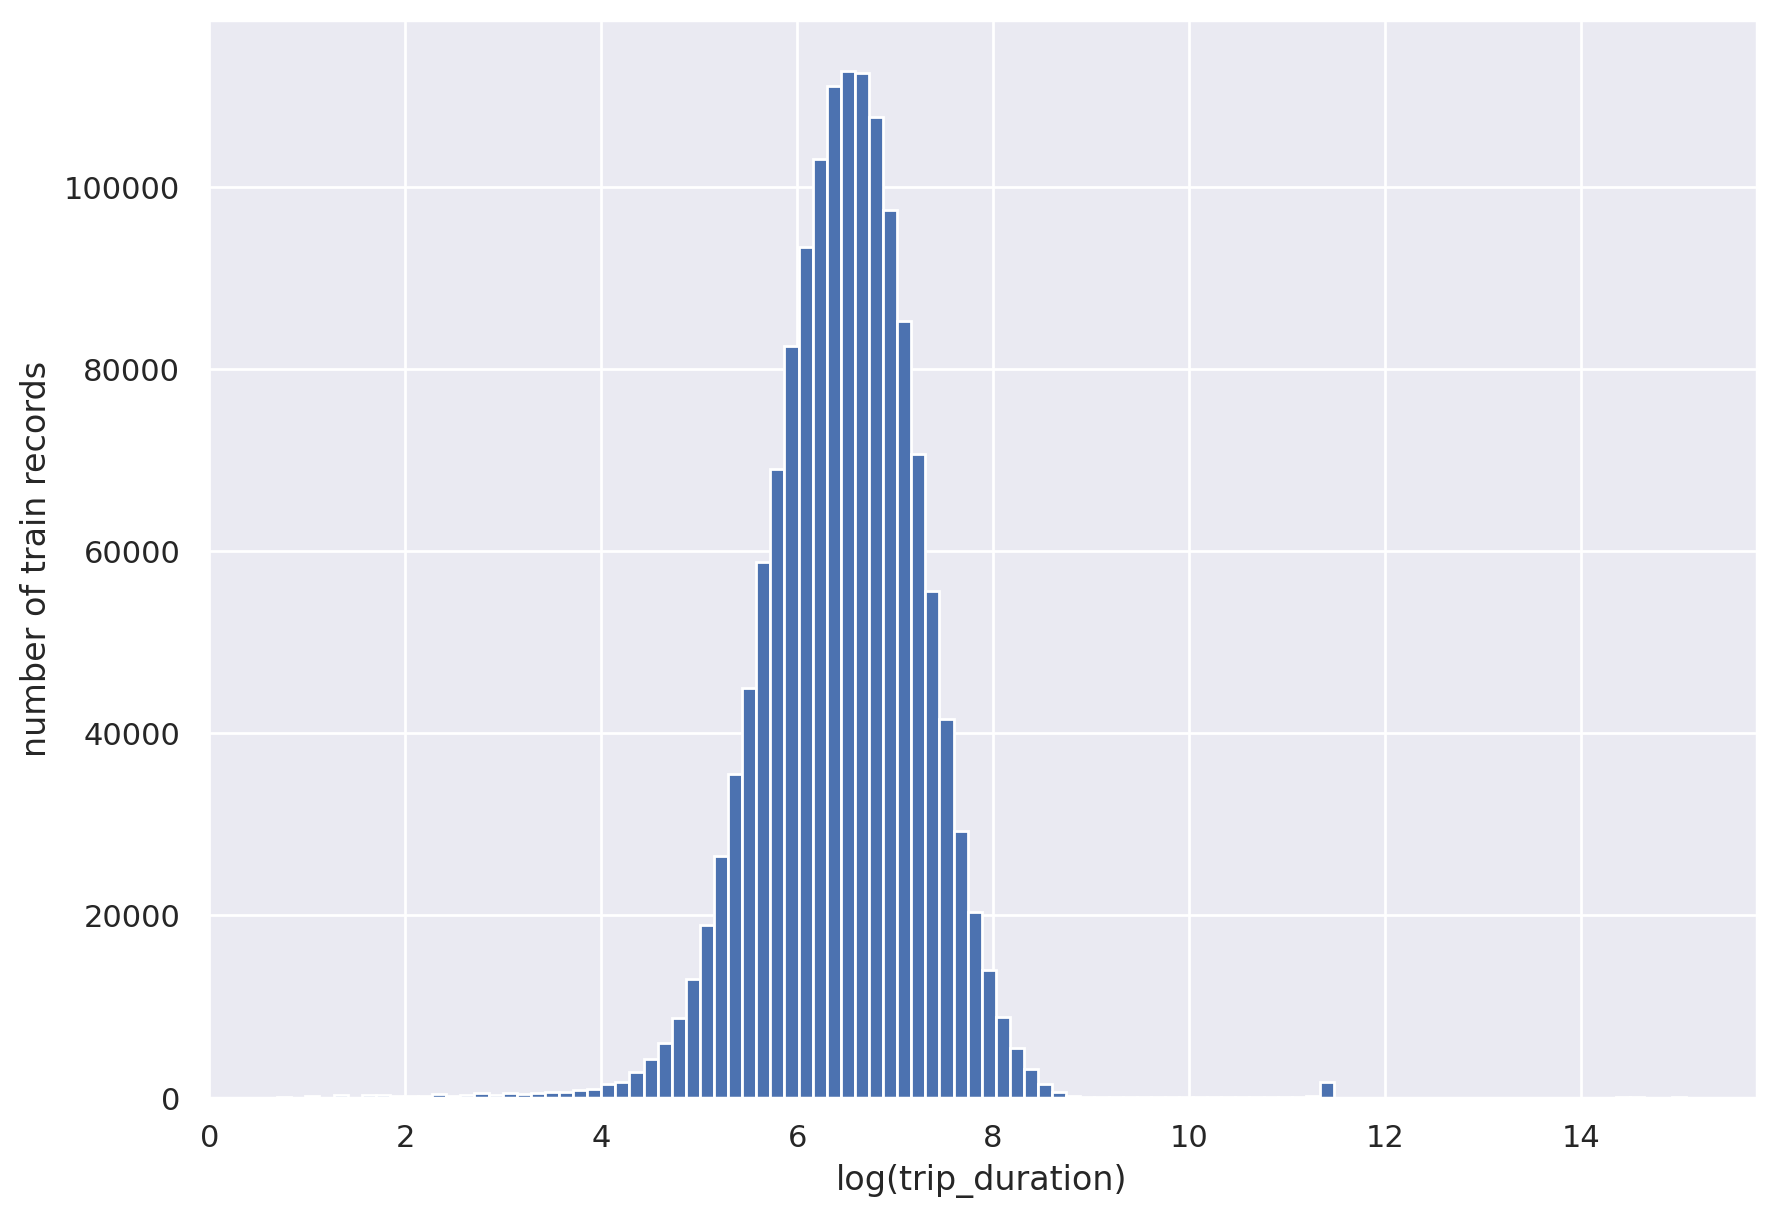

In [102]:
plt.hist(train['log_trip_duration'], bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [103]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(sum((log1p_y_true - log1p_y_pred) ** 2) / log1p_y_true.shape[0])


y_true = train['log_trip_duration'].mean() * np.ones_like(train['log_trip_duration'])
y_pred = train['log_trip_duration']
rmsle_best_count = rmsle(y_true, y_pred)

assert np.allclose(rmsle_best_count, 0.79575, 1e-4)

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [104]:
train['pickup_date'] = train['pickup_datetime'].dt.date
train.sort_values(by='pickup_datetime', inplace=True, ignore_index=True)

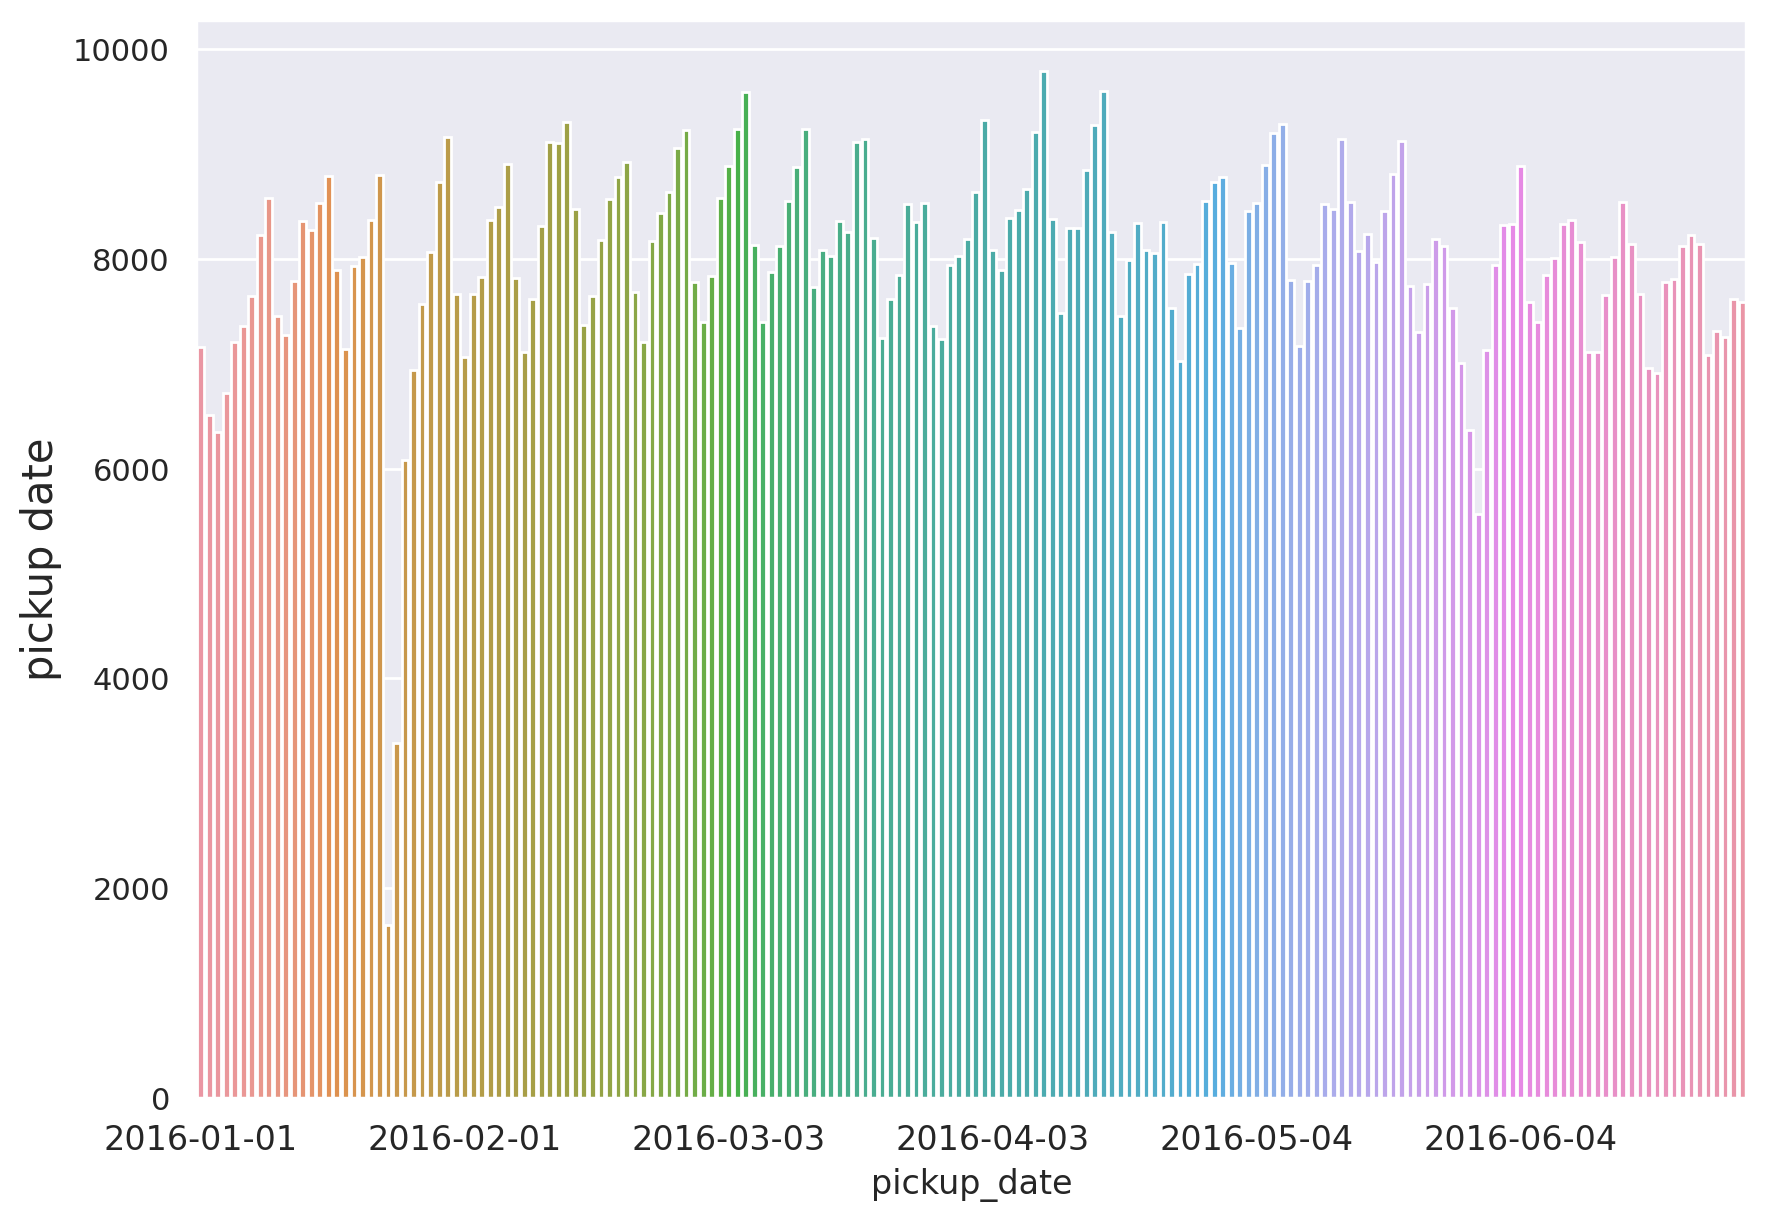

In [105]:
sns.countplot(x=train['pickup_date'])
plt.ylabel('pickup date', fontsize=15)


dates = train['pickup_date'].unique()
labels = dates[np.arange(0, len(dates), 31)]
ticks = np.arange(0, len(dates), 31)
plt.xticks(fontsize=12,
           labels=labels,
           ticks=ticks)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [106]:
dtp = train.groupby(['pickup_date']).agg({'id': 'count'}).reset_index()
dtp.sort_values(by='id')

pickup_date    id
22   2016-01-23  1648
23   2016-01-24  3383
150  2016-05-30  5570
24   2016-01-25  6084
2    2016-01-03  6353
..          ...   ...
43   2016-02-13  9309
92   2016-04-02  9325
64   2016-03-05  9597
106  2016-04-16  9602
99   2016-04-09  9796

[182 rows x 2 columns]

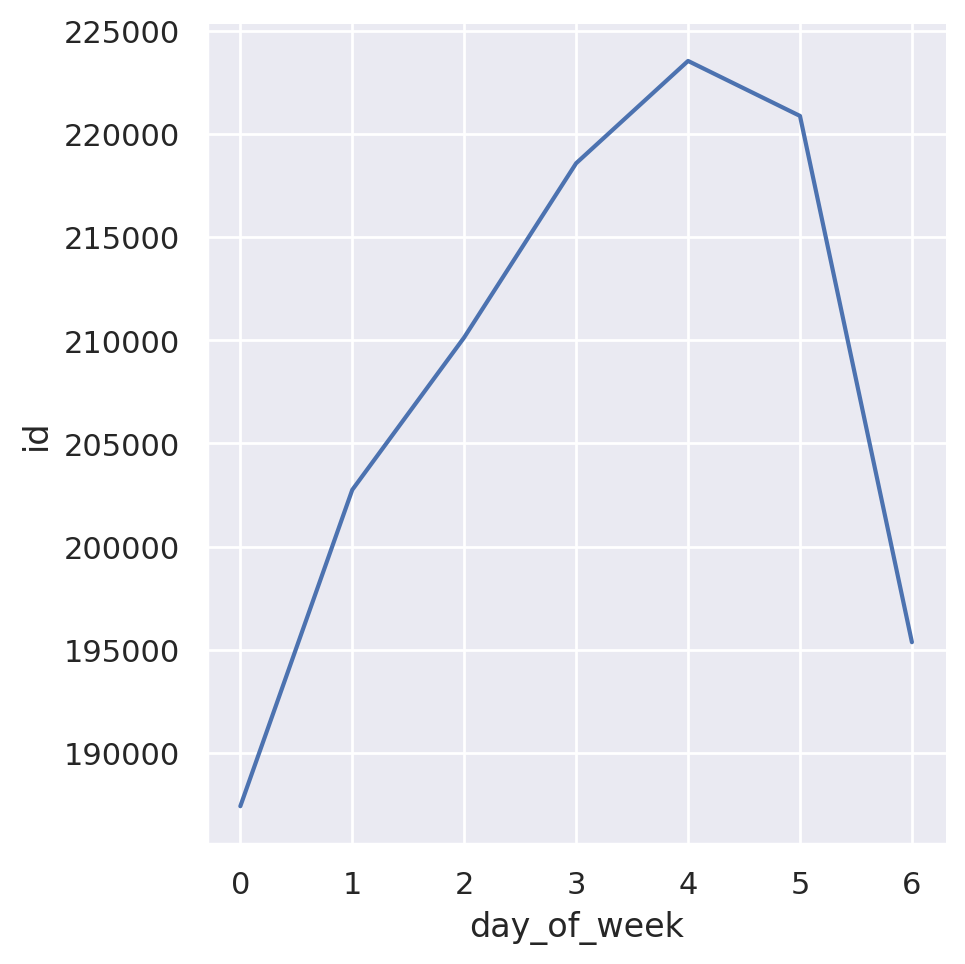

In [107]:
train['day_of_week'] = train['pickup_datetime'].dt.dayofweek
dtp = train.groupby(['day_of_week']).agg({'id': 'count'}).reset_index()
sns.relplot(x=dtp['day_of_week'], y=dtp['id'], kind='line')
plt.show()

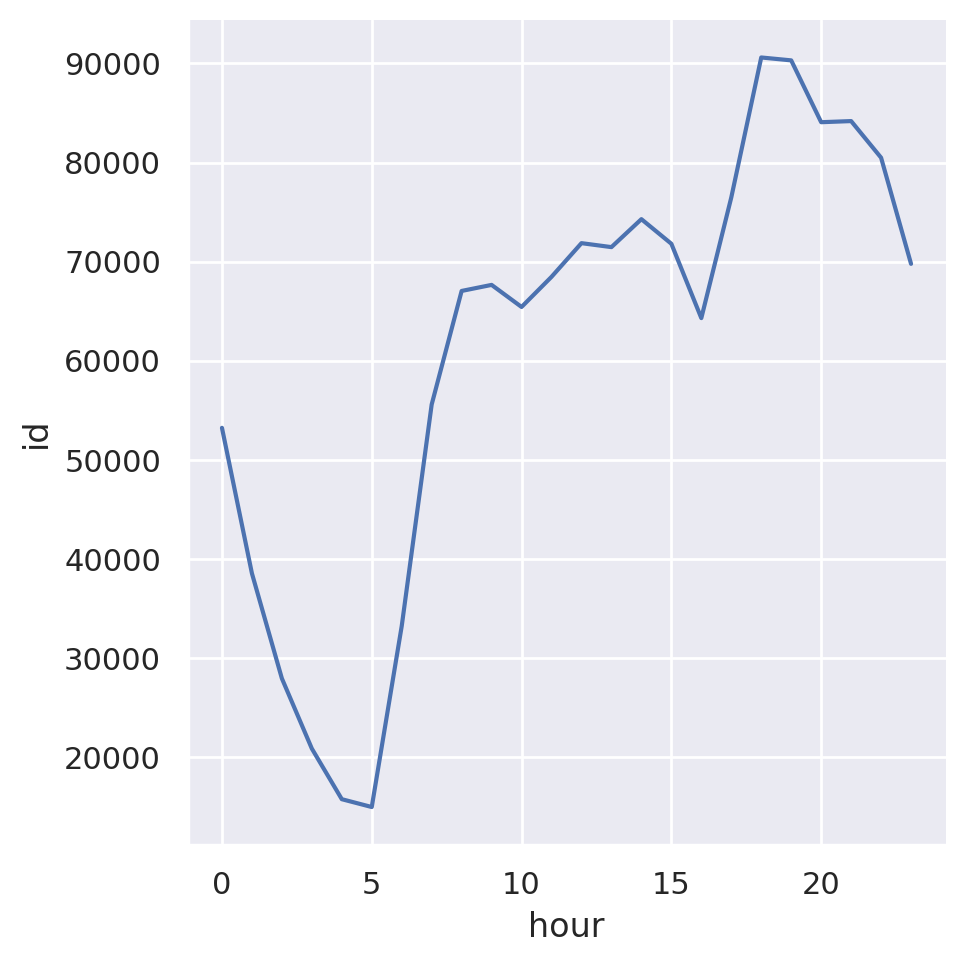

In [108]:
train['hour'] = train['pickup_datetime'].dt.hour
dtp = train.groupby(['hour']).agg({'id': 'count'}).reset_index()
sns.relplot(x=dtp['hour'], y=dtp['id'], kind='line')
plt.show()

2016-01-23 - Власти запретили автомобильное движение в Нью-Йорке из-за снежной бури \\
2016-05-30 - была стрельба


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

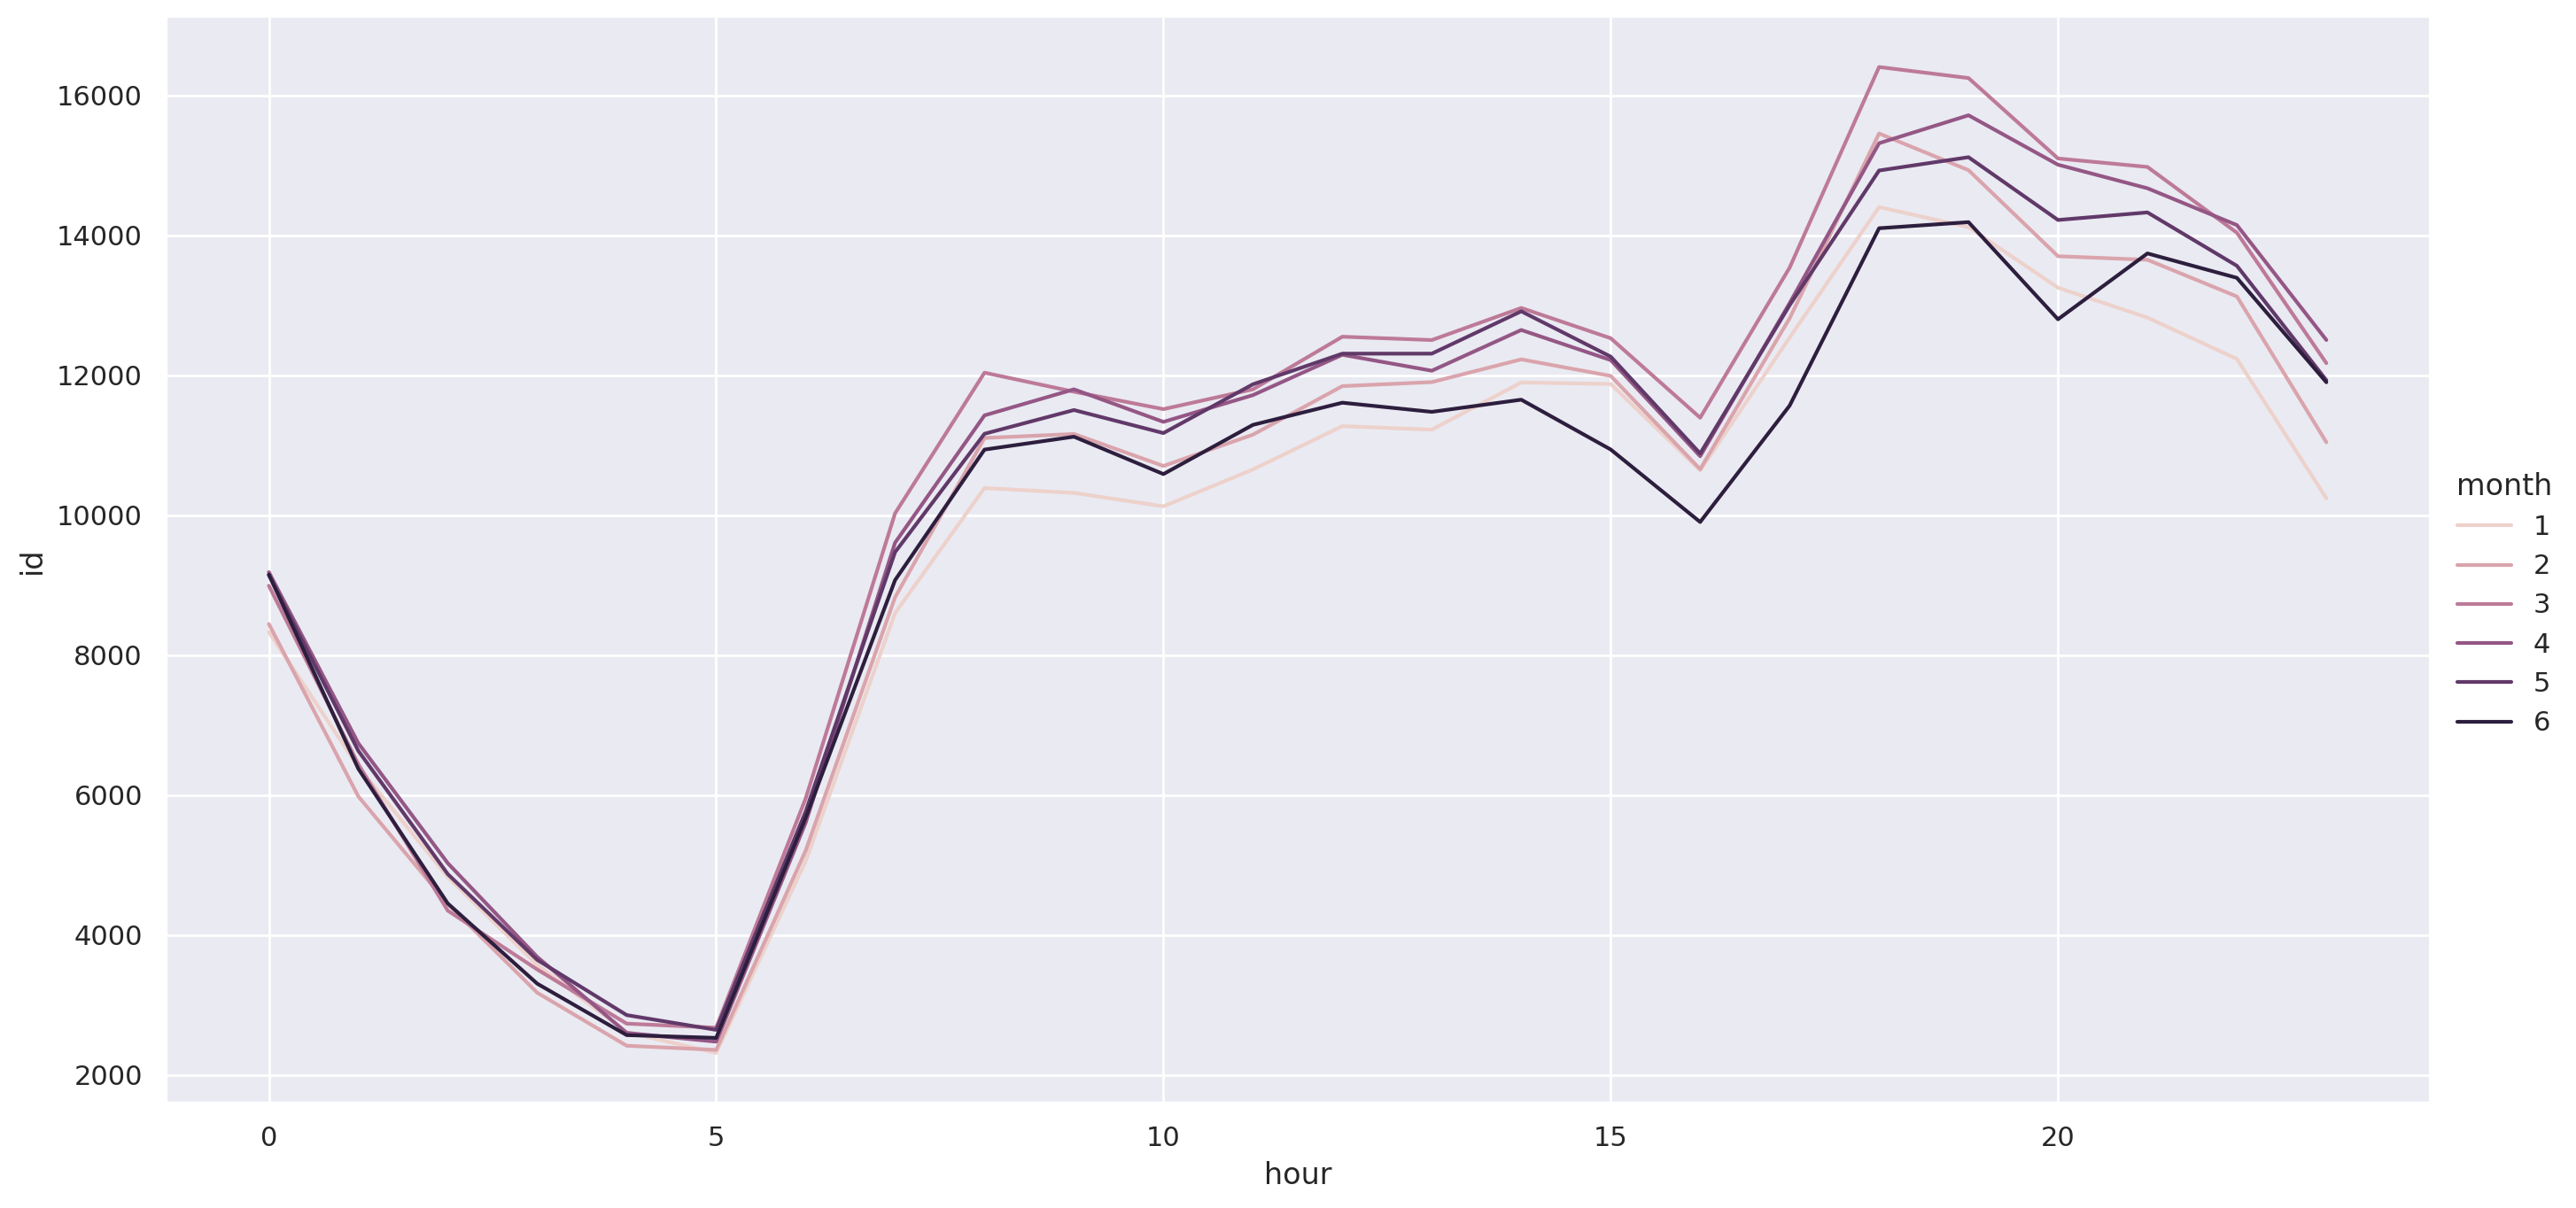

In [109]:
train['month'] = train['pickup_datetime'].dt.month
dtp = train.groupby(['hour', 'month']).agg({'id': 'count'}).reset_index()
sns.relplot(data=dtp, x='hour', y='id', hue='month', kind='line', aspect=2, height=7)
plt.show()

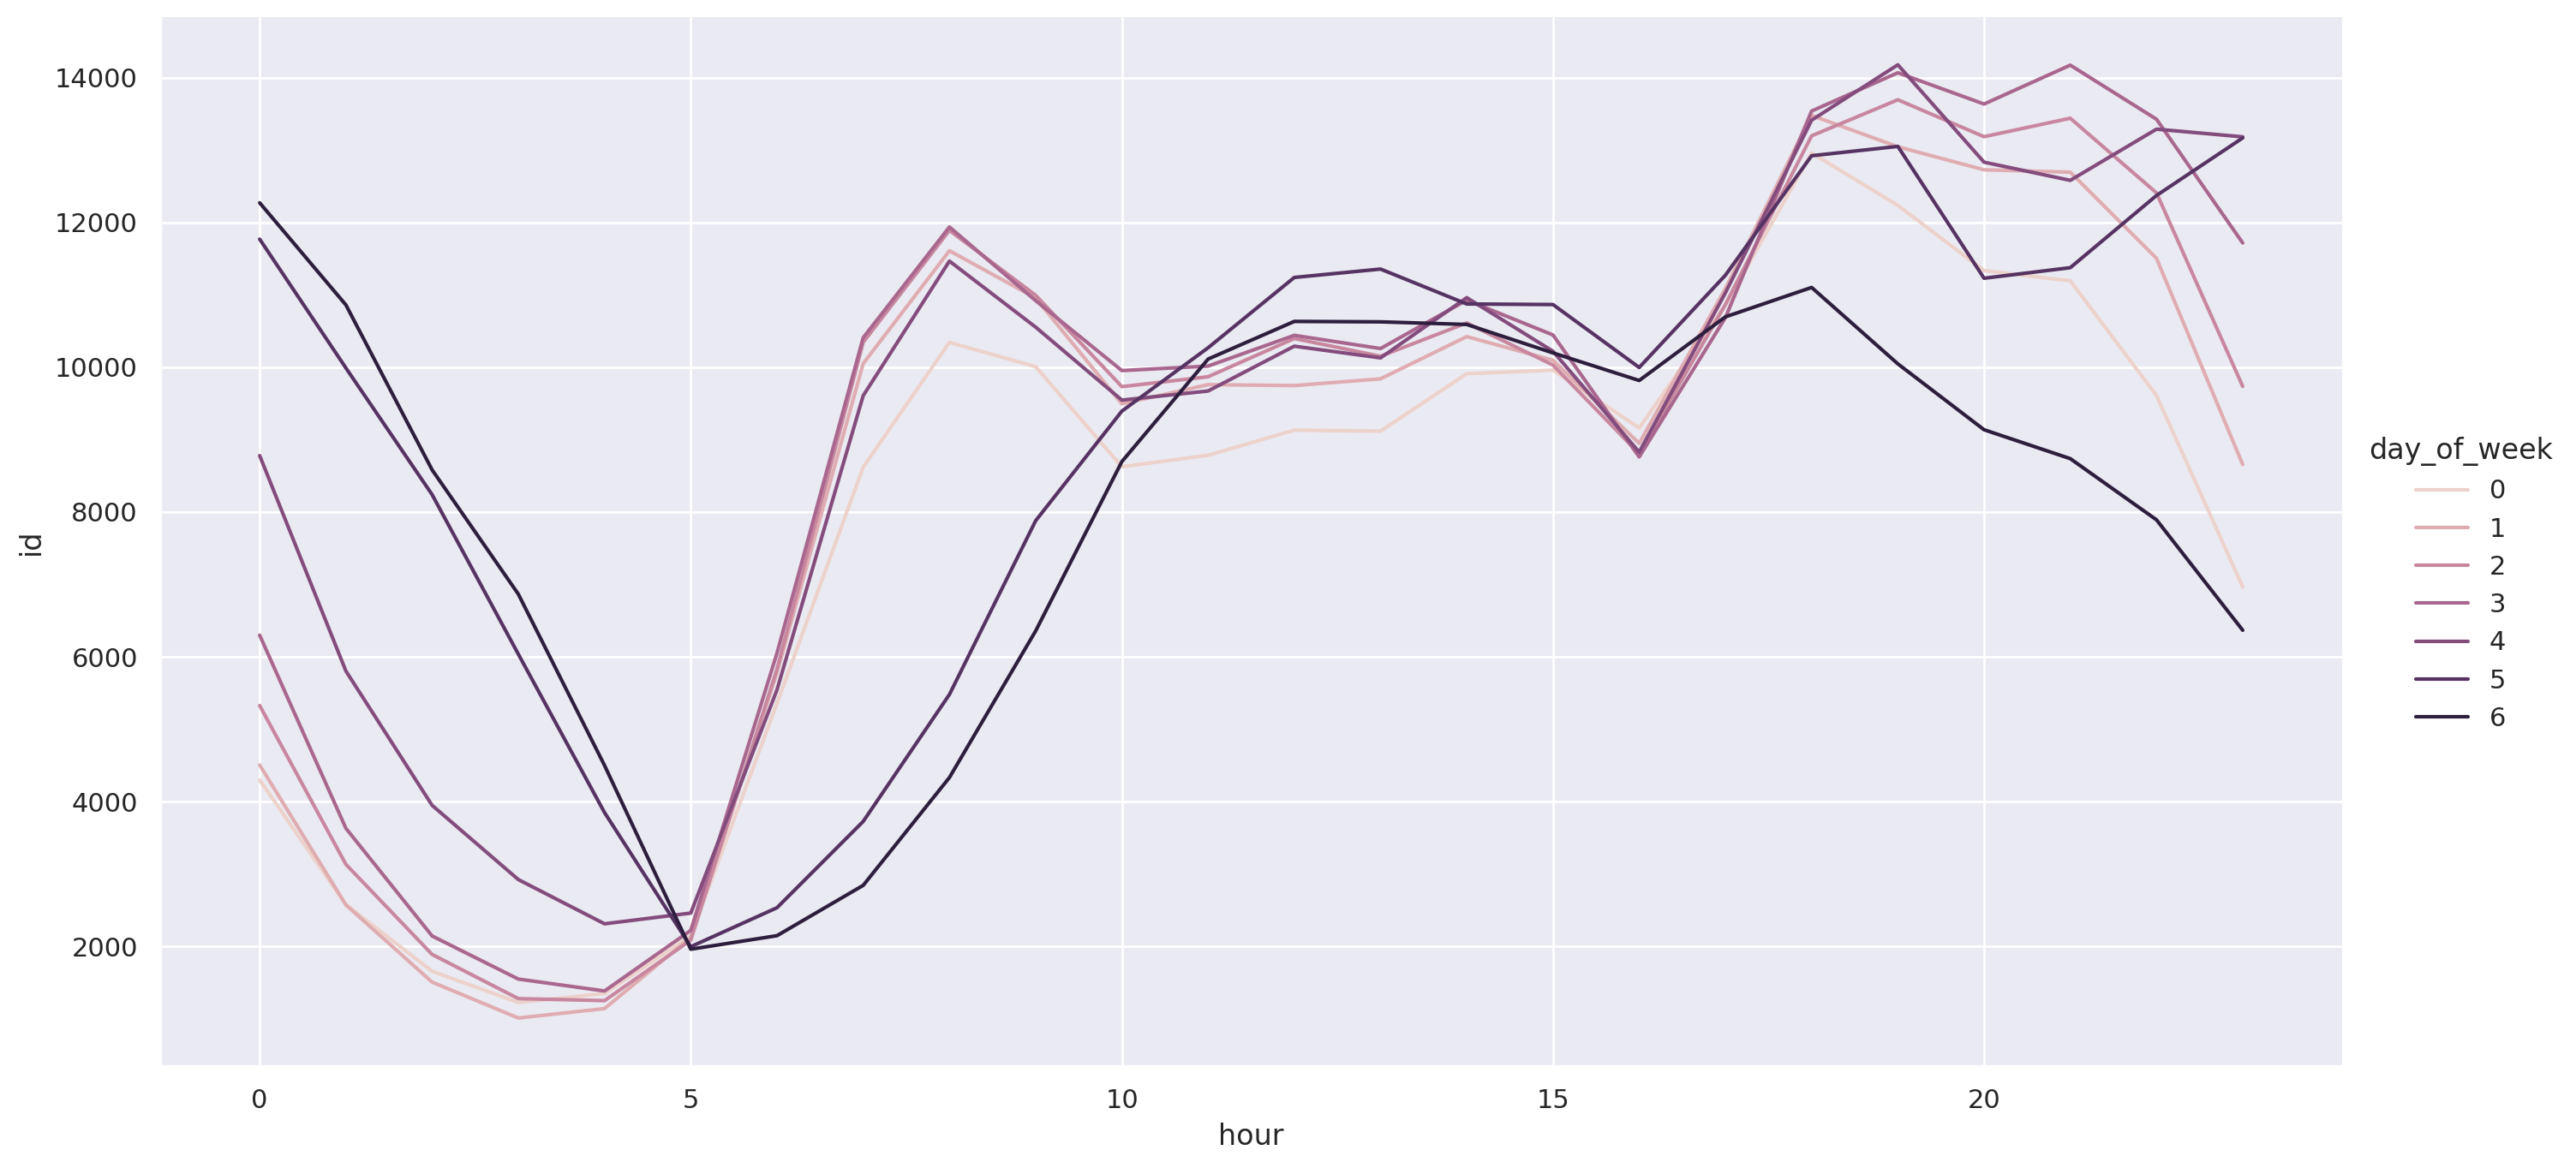

In [110]:
dtp = train.groupby(['hour', 'day_of_week']).agg({'id': 'count'}).reset_index()
sns.relplot(data=dtp, x='hour', y='id', hue='day_of_week', kind='line', aspect=2, height=7)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?
 **Видно что в сб и вс больше поездок в ночное время и меньше поездок днем в отличие от рабочих дней**

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [111]:
import datetime
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
train['is_abnormal1'] = False
train['is_abnormal2'] = False
train.loc[(train['pickup_date'] == datetime.datetime.strptime('2016-01-24', '%Y-%m-%d').date()) | (train['pickup_date'] == datetime.datetime.strptime('2016-01-23', '%Y-%m-%d').date()), 'is_abnormal1'] = True
train.loc[(train['pickup_date'] == datetime.datetime.strptime('2016-05-30', '%Y-%m-%d').date()) | (train['pickup_date'] == datetime.datetime.strptime('2016-05-29', '%Y-%m-%d').date()), 'is_abnormal2'] = True

In [112]:
from sklearn.model_selection import train_test_split

y = train['log_trip_duration']
X = train.drop(columns=['log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [113]:
X_train['log_trip_duration'] = y_train

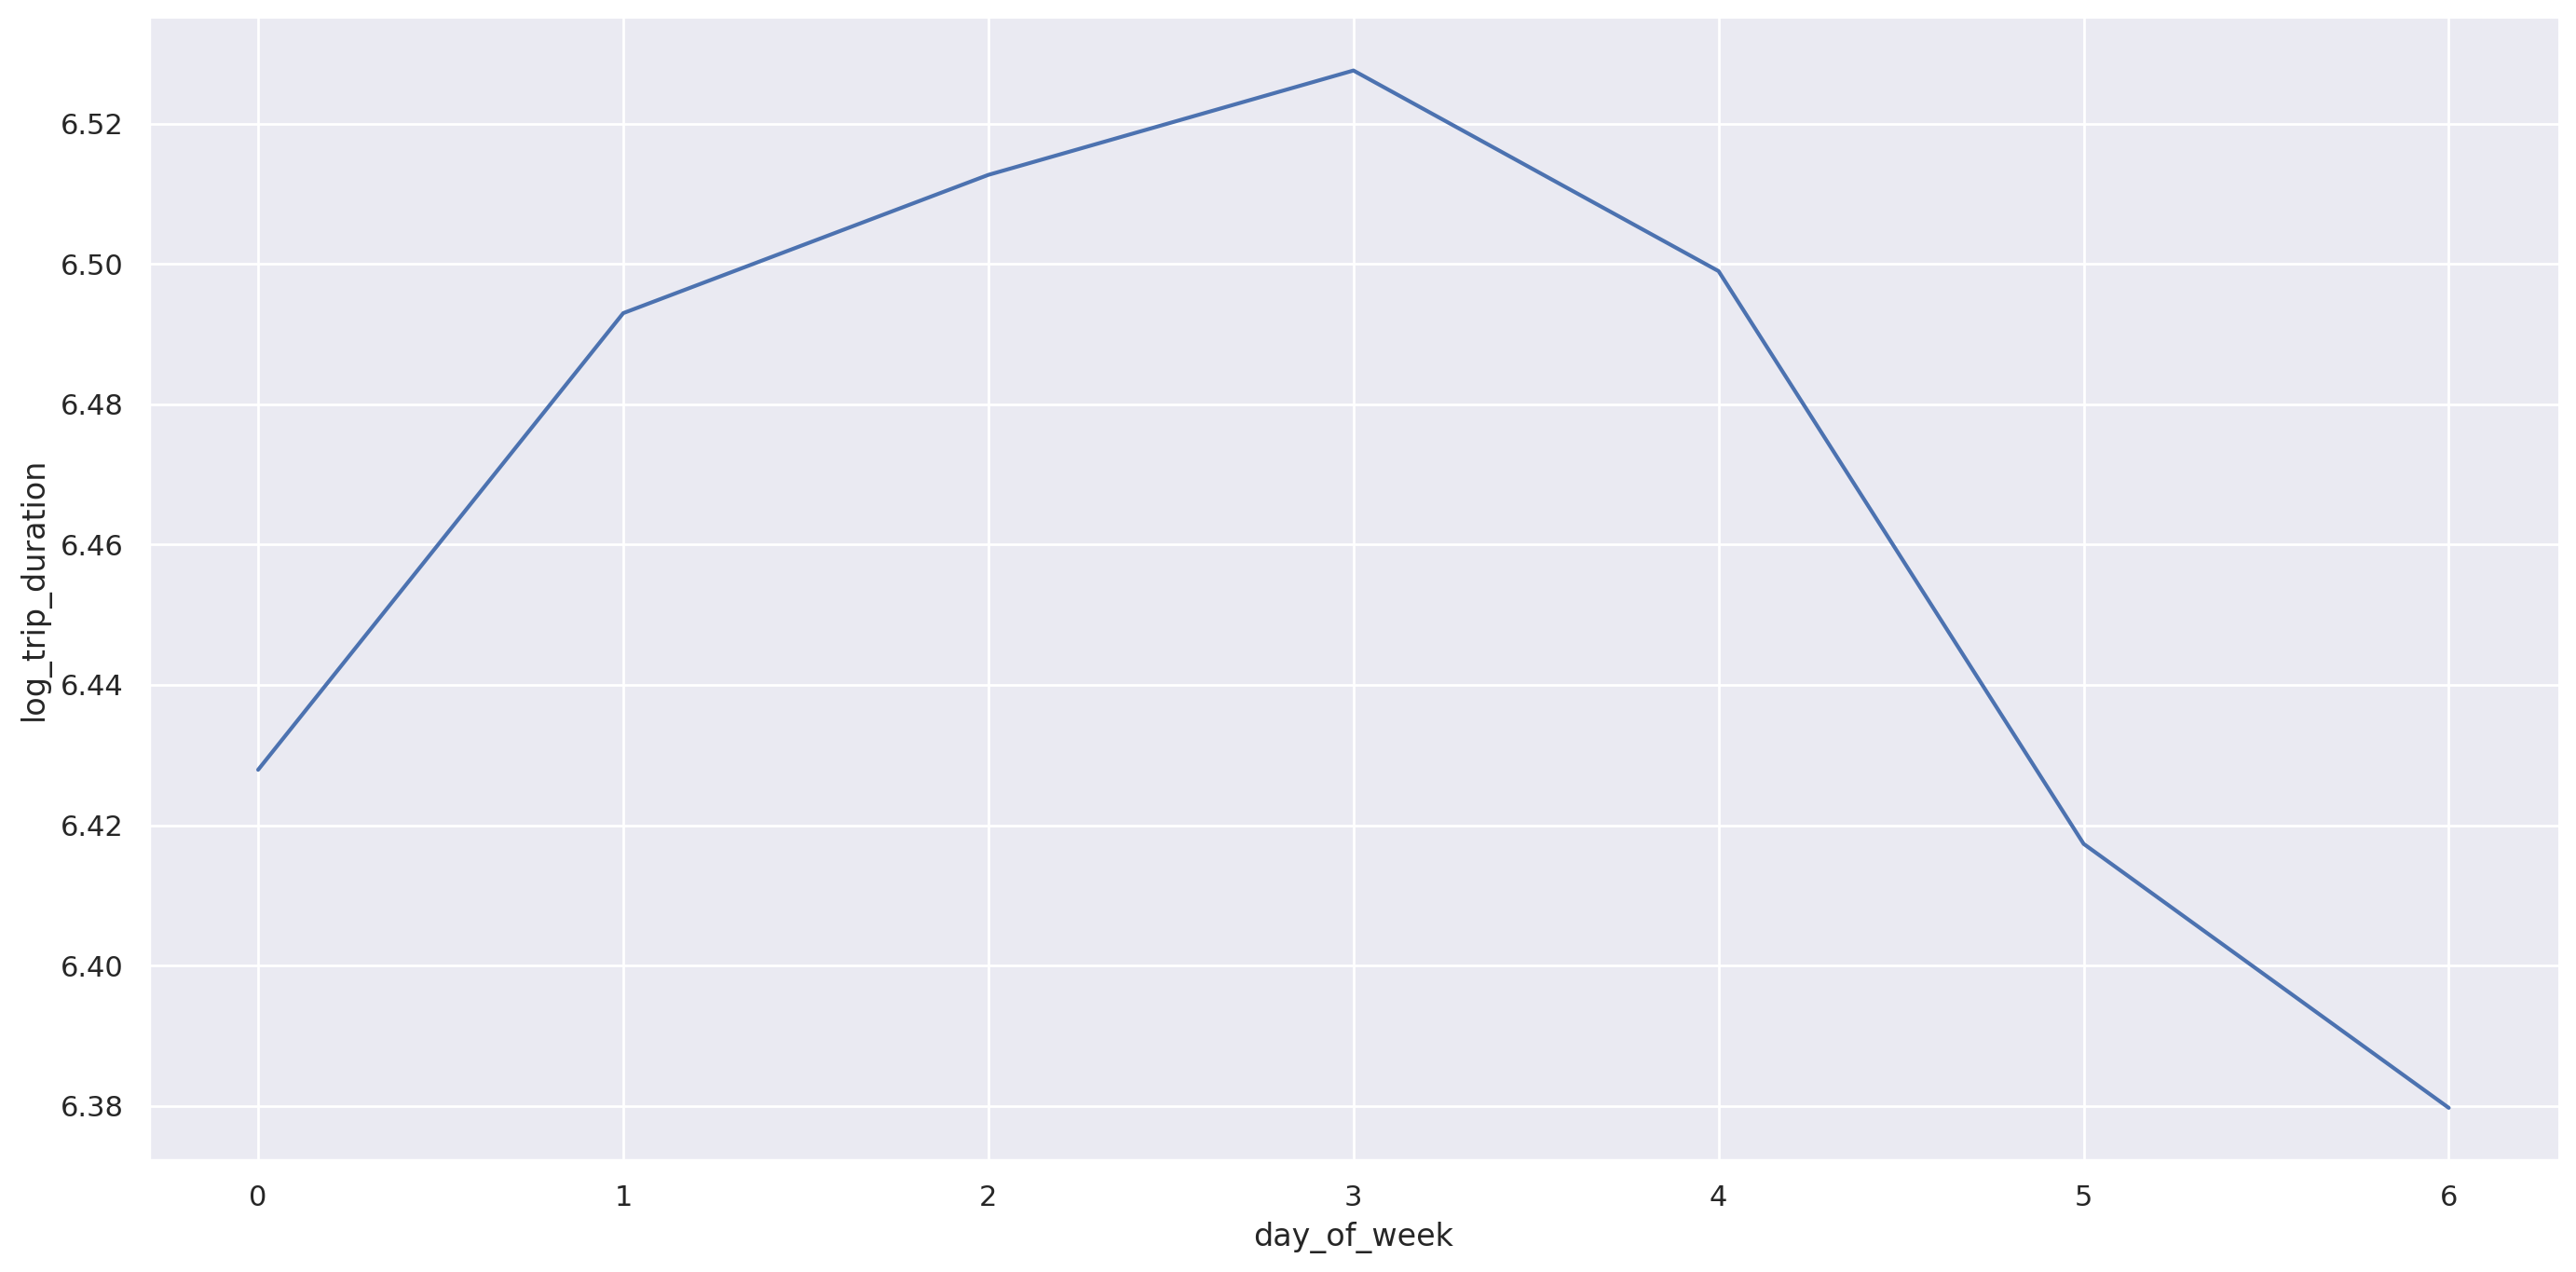

In [114]:
dtp = X_train.groupby(['day_of_week']).agg({'log_trip_duration': 'mean'}).reset_index()
sns.relplot(data=dtp, x='day_of_week', y='log_trip_duration', kind='line', aspect=2, height=7)
plt.show()

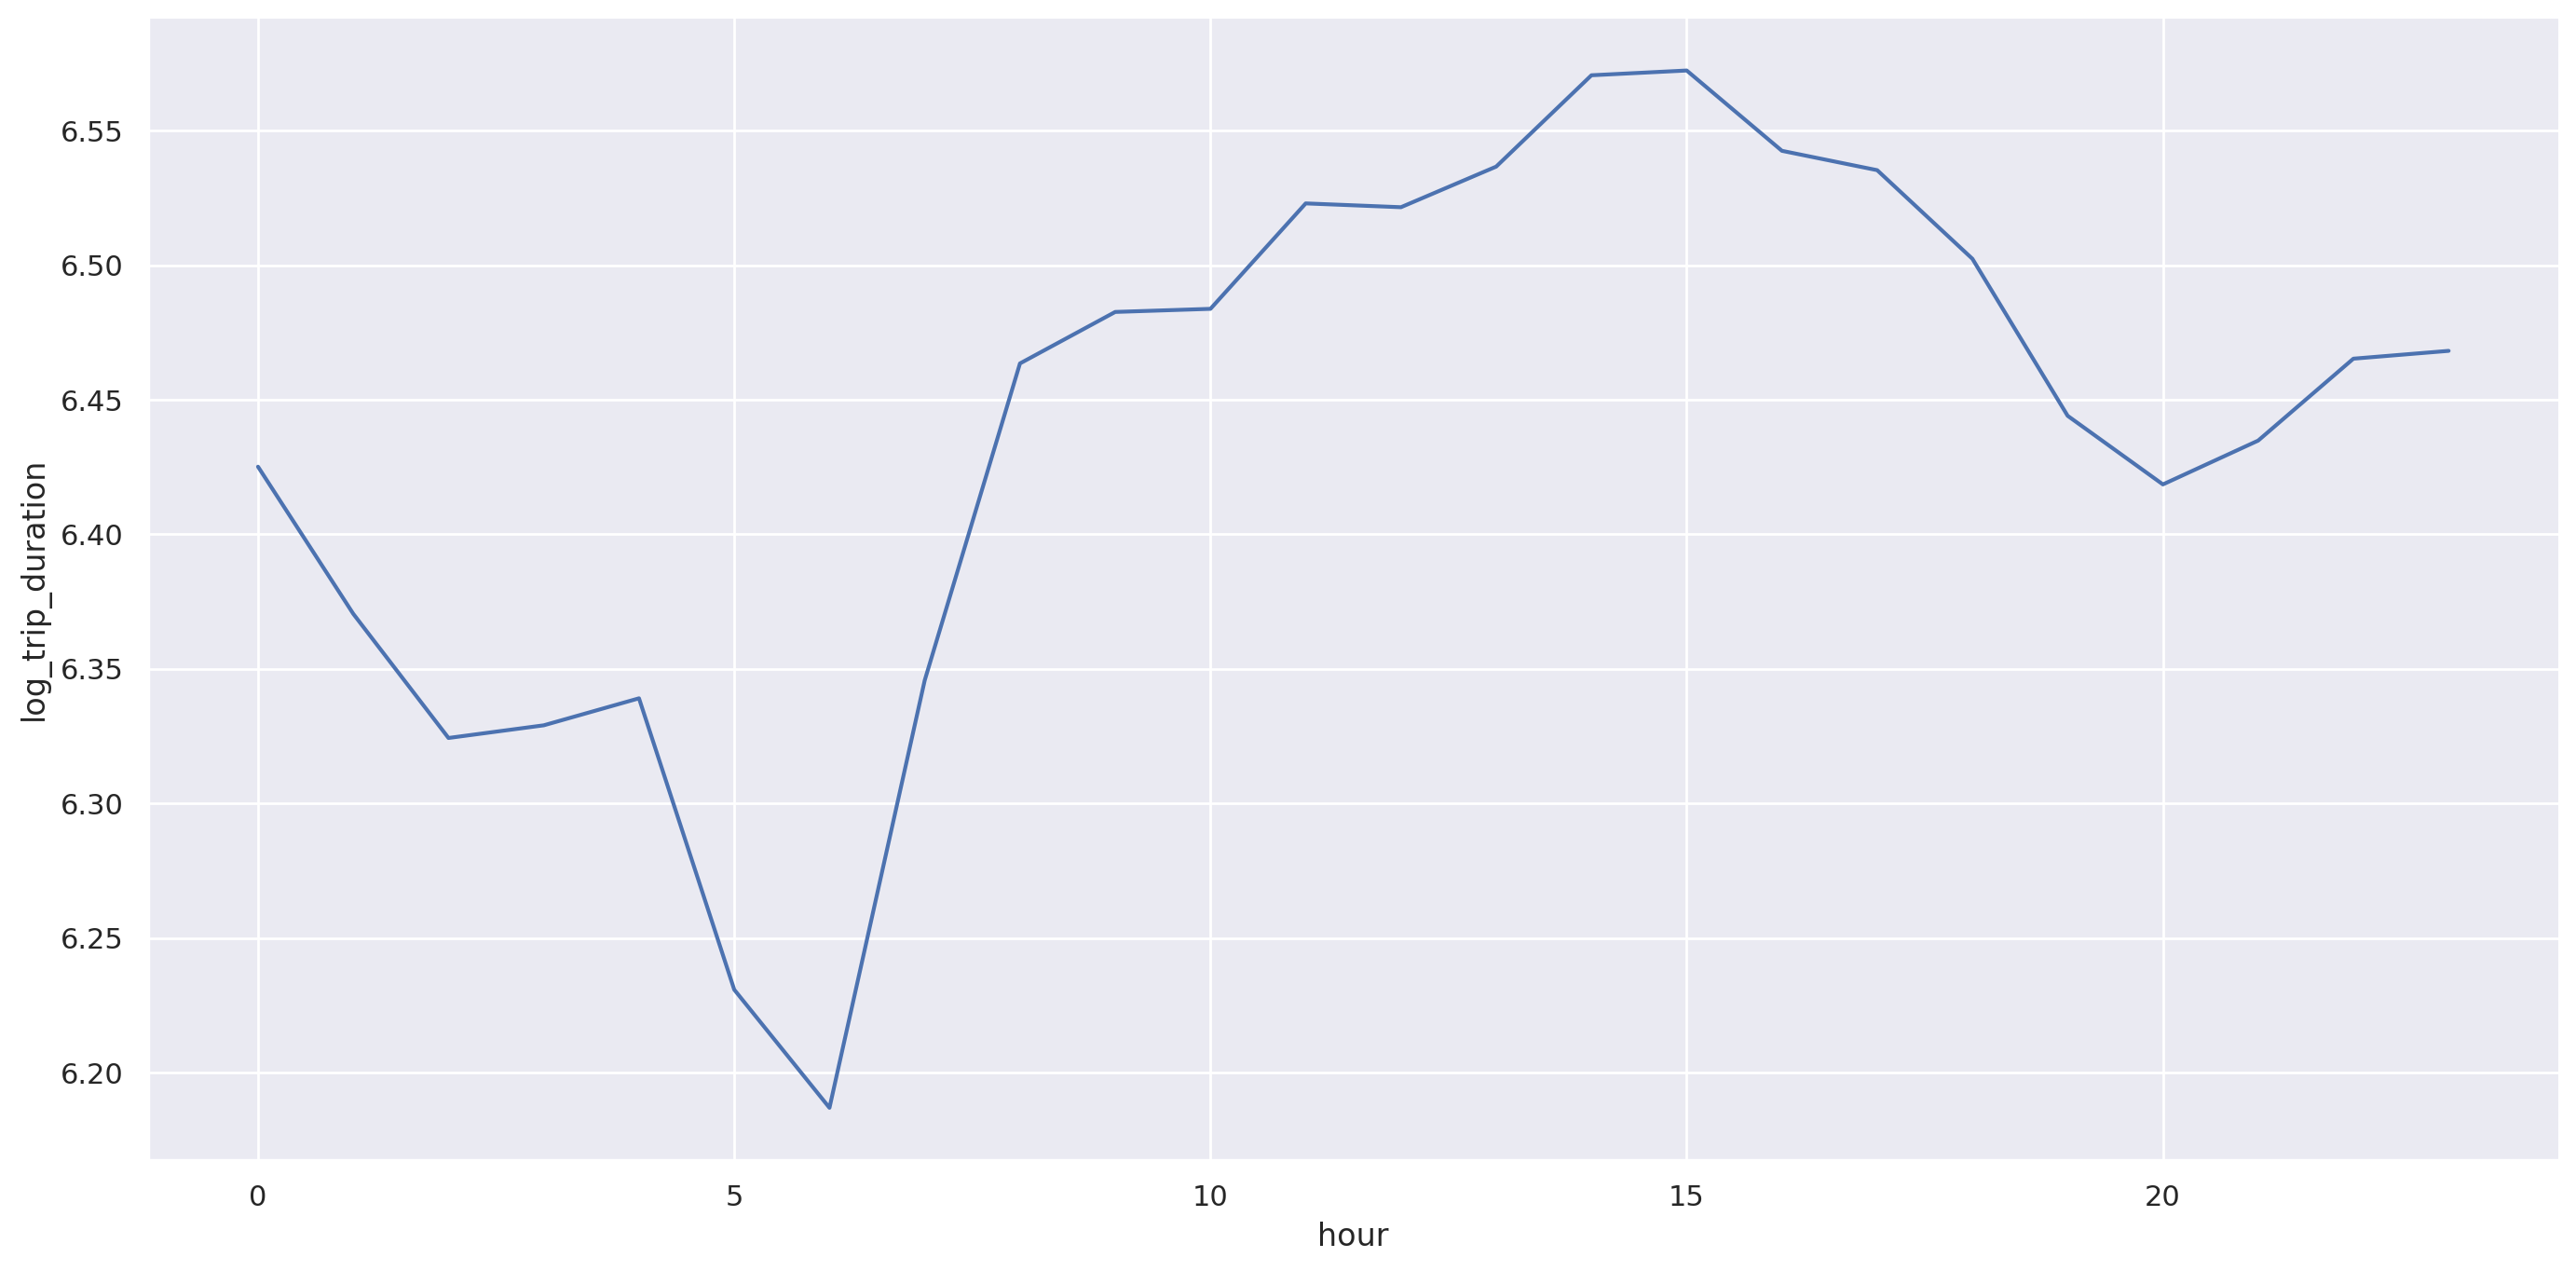

In [115]:
dtp = X_train.groupby(['hour']).agg({'log_trip_duration': 'mean'}).reset_index()
sns.relplot(data=dtp, x='hour', y='log_trip_duration', kind='line', aspect=2, height=7)
plt.show()

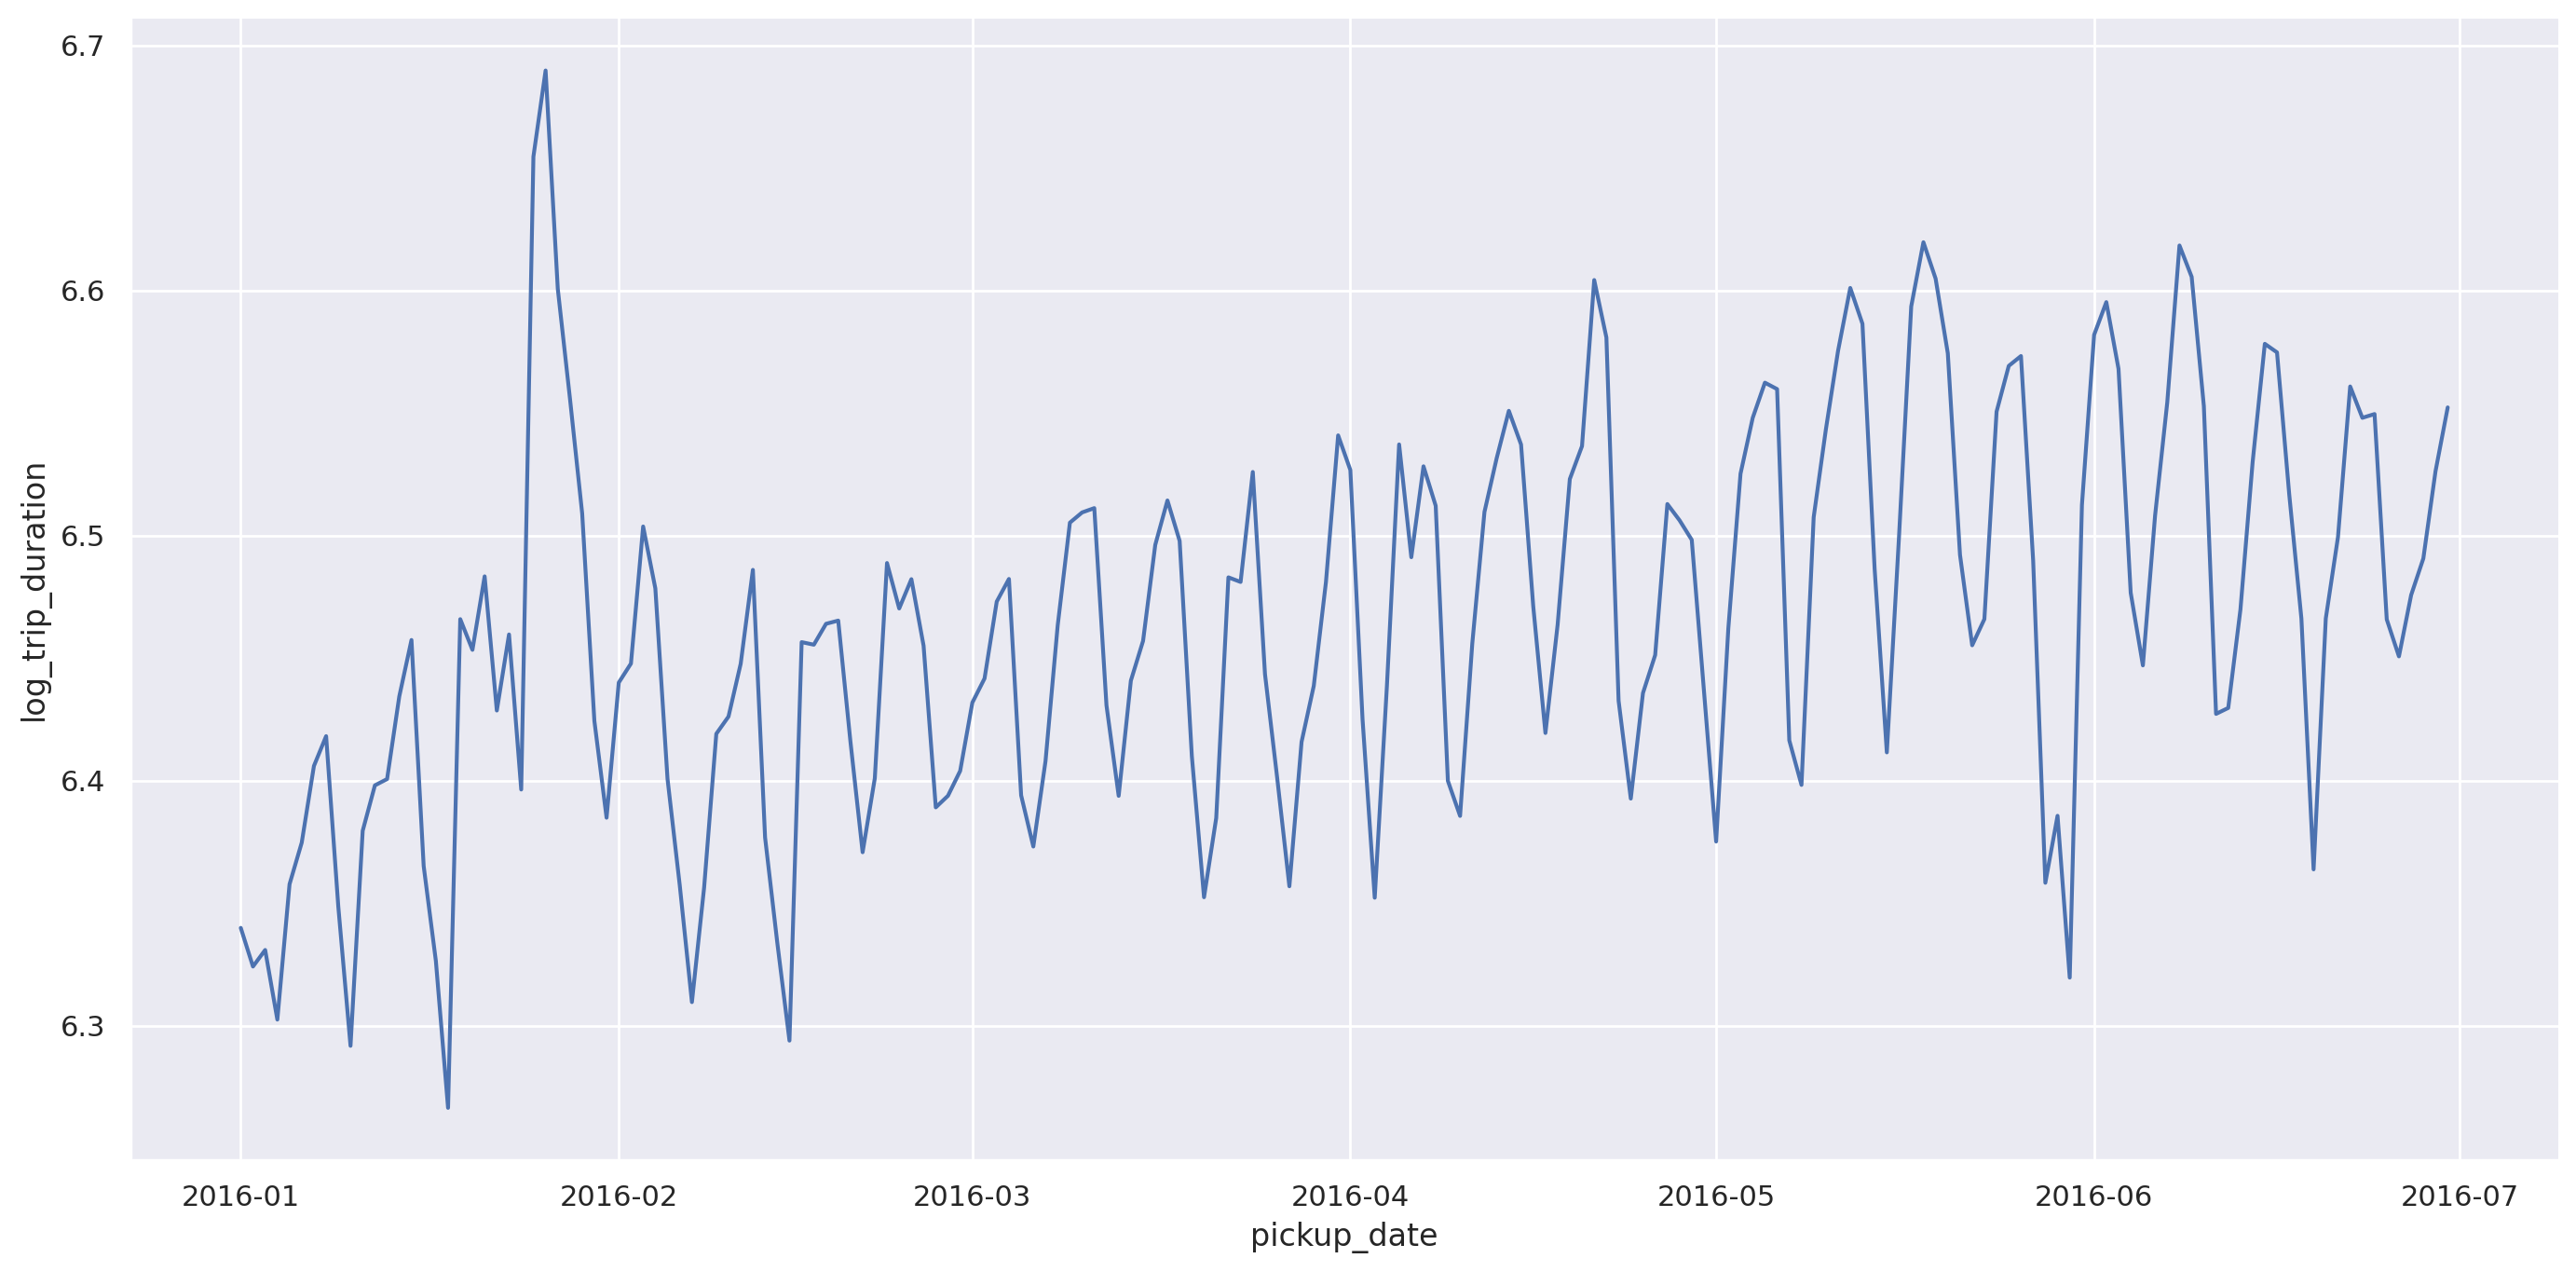

In [116]:
dtp = X_train.groupby(['pickup_date']).agg({'log_trip_duration': 'mean'}).reset_index()
sns.relplot(data=dtp, x='pickup_date', y='log_trip_duration', kind='line', aspect=2, height=7)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Графики похожи, что не очень удивительно, поскольку при увеличении колва поездок, появляются пробки. В 1 аномальный период были очень долгие поездки, видимо из-за плохо очищенных дорог. Наблюдается положительный тренд зависимости `log_trip_duration` от дня в году

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [117]:
X_train.drop(columns=['log_trip_duration'], inplace=True)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Является ли период аномальным - очевидные категориальные признаки. Мне кажется, что можно считать час и день в году за численные признаки, поскольку они принимают много разных значений(которые не хотелось бы выделять под категории) + по ним строятся графики с монотонными участками. Вот если бы можно было выделить в группы отдельные часы (к примеру рабочие и не рабочие часы, то можно было бы сделать категориальным признаком). Месяц я бы считал категориальным признаком, поскольку их графики схожи, но как будто немного сдвинуты по Y. День недели можно сделать категориальным(ну я проверил - там score лучше + всего 7 категорий)

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [118]:
X_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_date', 'day_of_week', 'hour', 'month', 'day_of_year',
       'is_abnormal1', 'is_abnormal2'],
      dtype='object')

In [120]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal1', 'is_abnormal2']

X_train_features = X_train[features]
X_test_features = X_test[features]


numeric_features = ['hour', 'day_of_year']
categorical_features = ['day_of_week', 'month', 'is_abnormal1', 'is_abnormal2']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)
y_train_pred = model.predict(X_train_features)

rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmsle for test = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle_train)

rmsle for test =  0.7931640070216297
rmsle for train =  0.7922819121857146


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [121]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [122]:
show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [123]:
show_circles_on_map(train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ:** аэропорт JFK и аэропорт LGA

Удаленные от центра масс пункты. Это достаточно нетипичные точки, которые сильно отличаются от основной массы

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [124]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [125]:
X_train.loc[:, 'haversine'] = haversine_array(X_train['pickup_latitude'].values, X_train['pickup_longitude'].values, X_train['dropoff_latitude'].values, X_train['dropoff_longitude'].values)
X_test.loc[:, 'haversine'] = haversine_array(X_test['pickup_latitude'].values, X_test['pickup_longitude'].values, X_test['dropoff_latitude'].values, X_test['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [126]:
X_train['log_haversine'] = np.log1p(X_train['haversine'])
X_test['log_haversine'] = np.log1p(X_test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [127]:
X_train

id  vendor_id     pickup_datetime  passenger_count  \
824746   id2669610          1 2016-04-12 19:37:14                1   
645821   id0015670          1 2016-03-22 08:29:05                1   
691846   id2138296          2 2016-03-27 20:58:11                1   
1147931  id0745545          1 2016-05-21 16:39:42                1   
183569   id1507791          2 2016-01-26 10:49:20                4   
...            ...        ...                 ...              ...   
1348317  id3683562          2 2016-06-16 16:10:25                1   
1154171  id0273321          1 2016-05-22 10:35:00                2   
617841   id2324312          2 2016-03-18 19:57:57                5   
1048548  id3133410          2 2016-05-09 19:05:32                1   
1393929  id2905481          2 2016-06-22 16:20:28                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
824746         -73.991859        40.744225         -73.960281   
645821         -73.941025        40.805969         -73.933815   
691846         -73.988647        40.748569         -73.984497   
1147931        -73.955582        40.776775         -73.939041   
183569         -73.983879        40.775478         -73.985123   
...                   ...              ...                ...   
1348317        -74.002586        40.747704         -73.992592   
1154171        -73.960999        40.769928         -73.954681   
617841         -73.954269        40.766151         -73.975098   
1048548        -73.952591        40.783009         -73.944649   
1393929        -73.993553        40.767269         -73.976883   

         dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
824746          40.771389                  N           1058  2016-04-12   
645821          40.844044                  N           1182  2016-03-22   
691846          40.732021                  N            524  2016-03-27   
1147931         40.804691                  N            483  2016-05-21   
183569          40.754910                  N           1524  2016-01-26   
...                   ...                ...            ...         ...   
1348317         40.743717                  N            240  2016-06-16   
1154171         40.783508                  N            668  2016-05-22   
617841          40.752048                  N            499  2016-03-18   
1048548         40.779831                  N            254  2016-05-09   
1393929         40.790218                  N            613  2016-06-22   

         day_of_week  hour  month  day_of_year  is_abnormal1  is_abnormal2  \
824746             1    19      4          103         False         False   
645821             1     8      3           82         False         False   
691846             6    20      3           87         False         False   
1147931            5    16      5          142         False         False   
183569             1    10      1           26         False         False   
...              ...   ...    ...          ...           ...           ...   
1348317            3    16      6          168         False         False   
1154171            6    10      5          143         False         False   
617841             4    19      3           78         False         False   
1048548            0    19      5          130         False         False   
1393929            2    16      6          174         False         False   

         haversine  log_haversine  
824746    4.024667       1.614359  
645821    4.276933       1.663345  
691846    1.873000       1.055357  
1147931   3.402133       1.482089  
183569    2.289548       1.190750  
...            ...            ...  
1348317   0.951519       0.668608  
1154171   1.601011       0.955900  
617841    2.353011       1.209859  
1048548   0.756324       0.563223  
1393929   2.912405       1.364152  

[1021050 rows x 19 columns]

In [128]:
your_df = X_train.copy()
your_df['log_trip_duration'] = train['log_trip_duration']
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

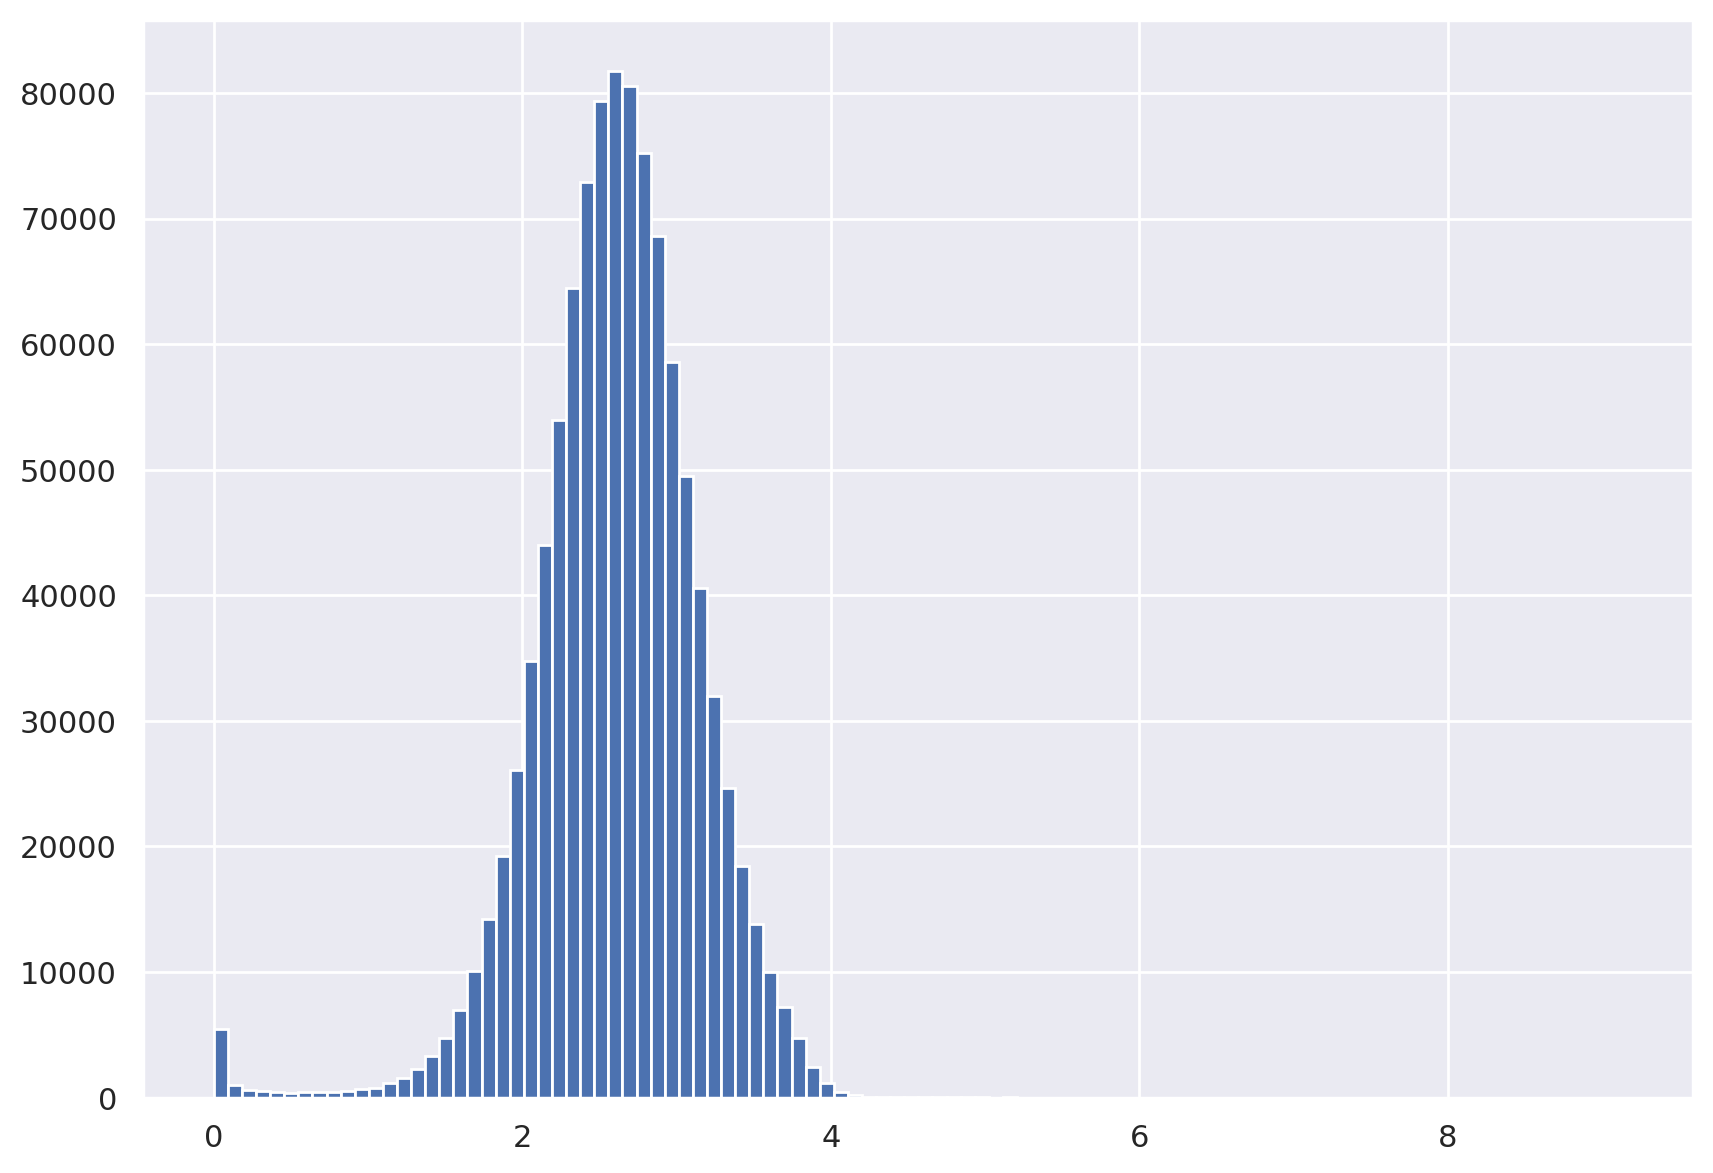

In [129]:
X_train['avg_speed'] = np.expm1(X_train['log_haversine']) / np.expm1(y_train) * 3600
X_test['avg_speed'] = np.expm1(X_test['log_haversine']) / np.expm1(y_test) * 3600

X_train['avg_speed'].describe()
plt.hist(np.log1p(X_train['avg_speed']), bins=100)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

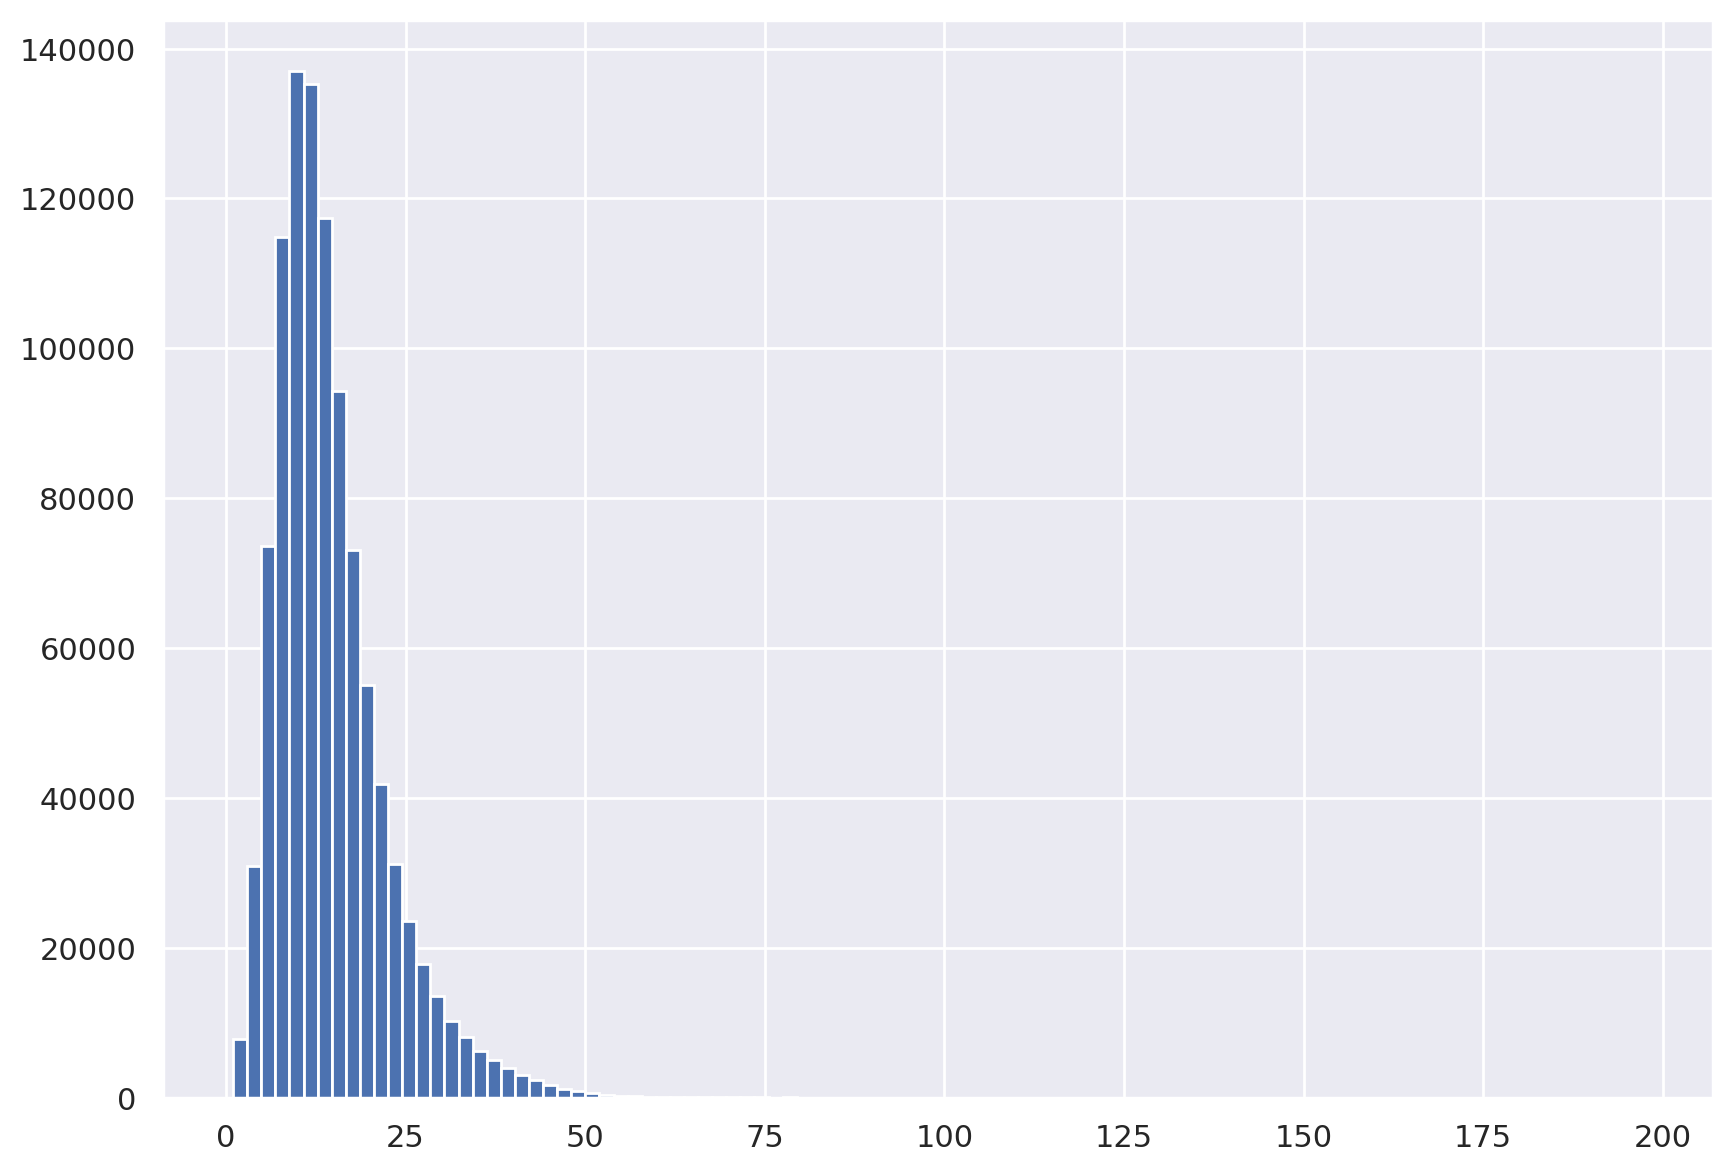

In [130]:
max_speed = 200
min_speed = 1

X_train_low = X_train.copy()
X_train_low = X_train_low.loc[(X_train_low['avg_speed'] > min_speed) & (X_train_low['avg_speed'] < max_speed)]

plt.hist((X_train_low['avg_speed']), bins=100)
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<ipython-input-131-f627c2278c0a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dt1 = X_train.groupby(['day_of_week', 'hour']).agg({'avg_speed': 'median'}).reset_index().pivot('day_of_week', 'hour', 'avg_speed')


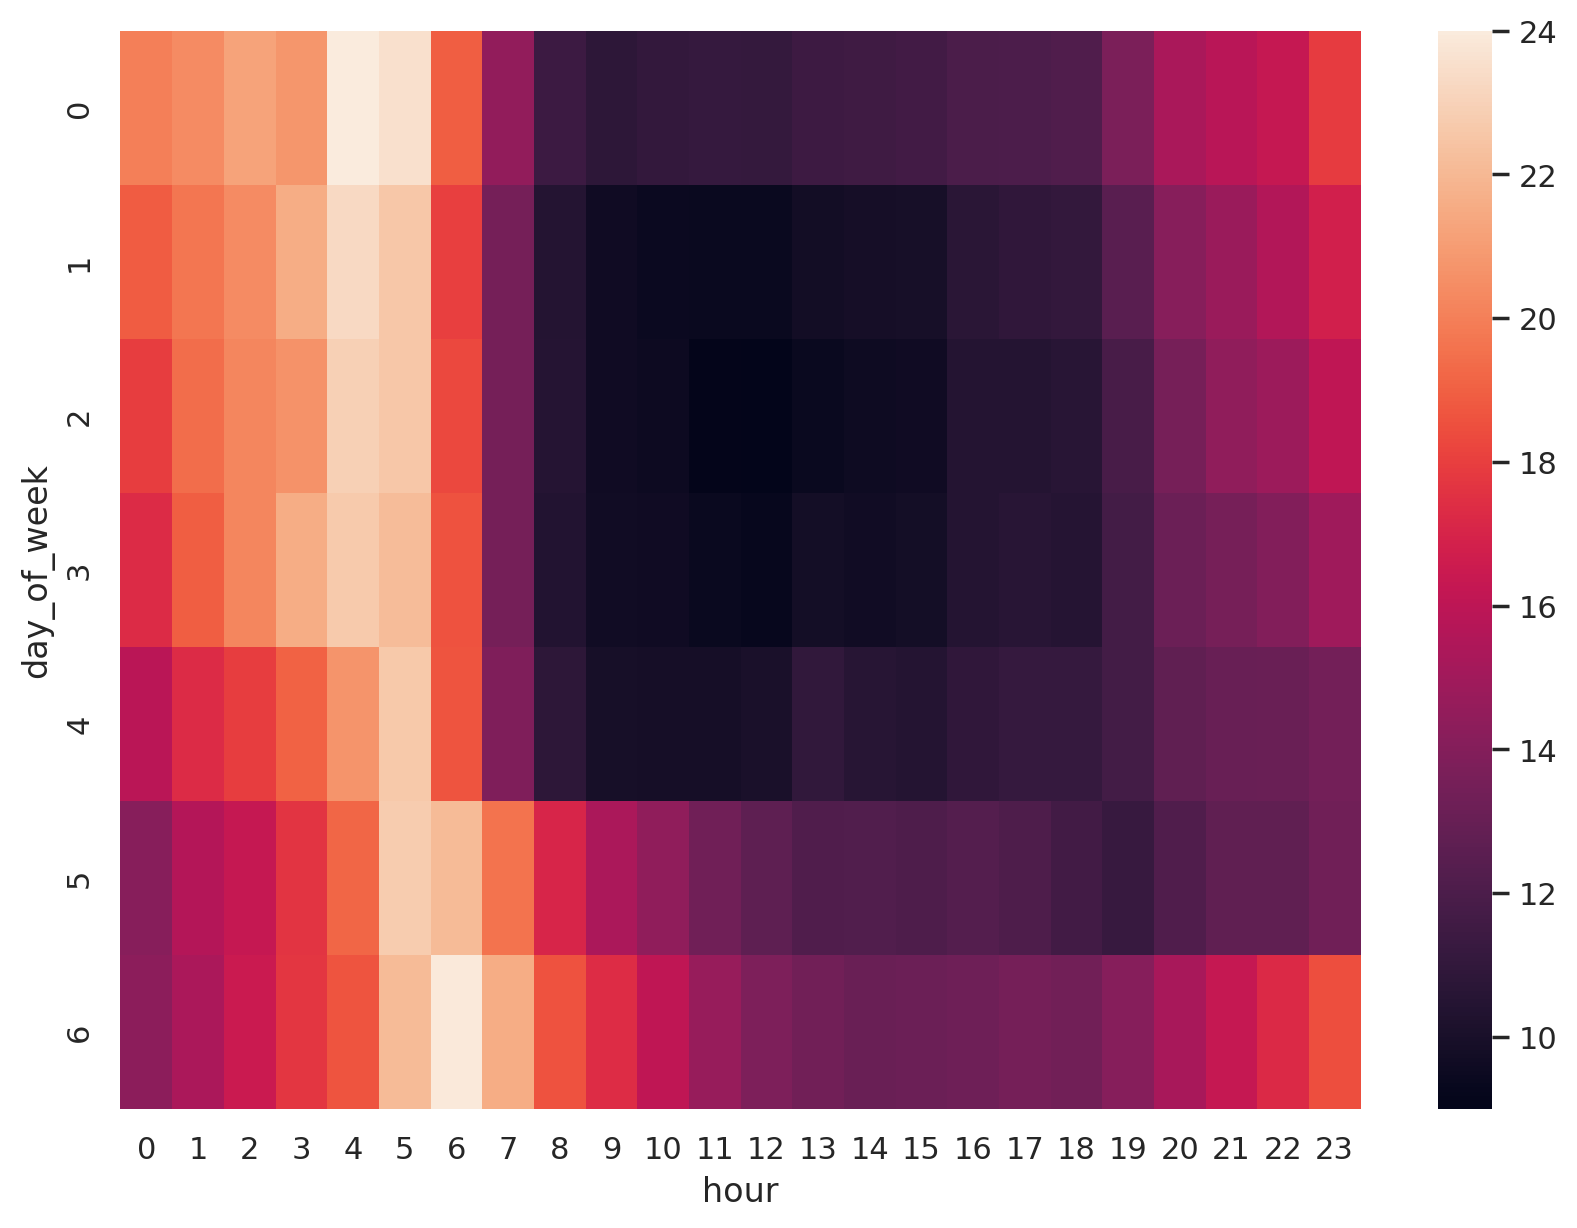

In [131]:
dt1 = X_train.groupby(['day_of_week', 'hour']).agg({'avg_speed': 'median'}).reset_index().pivot('day_of_week', 'hour', 'avg_speed')
sns.heatmap(dt1)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения? **лин. зависим с временем и расстоянием**

In [132]:
X_train.drop(columns=['avg_speed'], inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [133]:
X_train['is_traffic_jams_period'] = False
X_test['is_traffic_jams_period'] = False
X_train.loc[((X_train['hour'] > 6) & (X_train['hour'] < 20) & (X_train['day_of_week'] < 5) & (X_train['day_of_week'] >= 0)) |
            ((X_train['hour'] > 16) & (X_train['hour'] < 23) & (X_train['day_of_week'] == 5)), 'is_traffic_jams_period'] = True
X_test.loc[((X_test['hour'] > 6) & (X_test['hour'] < 20) & (X_test['day_of_week'] < 5) & (X_test['day_of_week'] >= 0)) |
            ((X_test['hour'] > 16) & (X_test['hour'] < 23) & (X_test['day_of_week'] == 5)), 'is_traffic_jams_period'] = True

X_train['is_no_traffic_period'] = False
X_test['is_no_traffic_period'] = False
X_train.loc[((X_train['hour'] > 1) & (X_train['hour'] < 6) & (X_train['day_of_week'] < 4) & (X_train['day_of_week'] >= 0)) |
            ((X_train['hour'] > 4) & (X_train['hour'] < 7) & (X_train['day_of_week'] <= 6) & (X_train['day_of_week'] > 4)) |
            ((X_train['hour'] > 3) & (X_train['hour'] < 5) & (X_train['day_of_week'] == 4)), 'is_no_traffic_period'] = True
X_test.loc[((X_test['hour'] > 1) & (X_test['hour'] < 6) & (X_test['day_of_week'] < 4) & (X_test['day_of_week'] >= 0)) |
            ((X_test['hour'] > 4) & (X_test['hour'] < 7) & (X_test['day_of_week'] <= 6) & (X_test['day_of_week'] > 4)) |
            ((X_test['hour'] > 3) & (X_test['hour'] < 5) & (X_test['day_of_week'] == 4)), 'is_no_traffic_period'] = True

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [134]:
# координаты подобраны основываясь на гугл картах
# аэропорт JFK
jfk_longitude_mi = -73.811
jfk_longitude_ma = -73.750
jfk_latitude_mi = 40.628
jfk_latitude_ma = 40.664

# аэропорт LGA
lga_longitude_ma = -73.862
lga_longitude_mi = -73.887
lga_latitude_mi = 40.766
lga_latitude_ma = 40.784

X_train['pickup_jfk'] = False
X_train['dropoff_jfk'] = False
X_train['pickup_lga'] = False
X_train['dropoff_lga'] = False

X_train.loc[(X_train['pickup_latitude'] > jfk_latitude_mi) & (X_train['pickup_latitude'] < jfk_latitude_ma) &
            (X_train['pickup_longitude'] > jfk_longitude_mi) & (X_train['pickup_longitude'] < jfk_longitude_ma),
            'pickup_jfk'] = True

X_train.loc[(X_train['dropoff_latitude'] > jfk_latitude_mi) & (X_train['dropoff_latitude'] < jfk_latitude_ma) &
            (X_train['dropoff_longitude'] > jfk_longitude_mi) & (X_train['dropoff_longitude'] < jfk_longitude_ma),
            'dropoff_jfk'] = True

X_train.loc[(X_train['pickup_latitude'] > lga_latitude_mi) & (X_train['pickup_latitude'] < lga_latitude_ma) &
            (X_train['pickup_longitude'] > lga_longitude_mi) & (X_train['pickup_longitude'] < lga_longitude_ma),
            'pickup_lga'] = True

X_train.loc[(X_train['dropoff_latitude'] > lga_latitude_mi) & (X_train['dropoff_latitude'] < lga_latitude_ma) &
            (X_train['dropoff_longitude'] > lga_longitude_mi) & (X_train['dropoff_longitude'] < lga_longitude_ma),
            'dropoff_lga'] = True

X_test['pickup_jfk'] = False
X_test['dropoff_jfk'] = False
X_test['pickup_lga'] = False
X_test['dropoff_lga'] = False

X_test.loc[(X_test['pickup_latitude'] > jfk_latitude_mi) & (X_test['pickup_latitude'] < jfk_latitude_ma) &
           (X_test['pickup_longitude'] > jfk_longitude_mi) & (X_test['pickup_longitude'] < jfk_longitude_ma),
           'pickup_jfk'] = True

X_test.loc[(X_test['dropoff_latitude'] > jfk_latitude_mi) & (X_test['dropoff_latitude'] < jfk_latitude_ma) &
           (X_test['dropoff_longitude'] > jfk_longitude_mi) & (X_test['dropoff_longitude'] < jfk_longitude_ma),
           'dropoff_jfk'] = True

X_test.loc[(X_test['pickup_latitude'] > lga_latitude_mi) & (X_test['pickup_latitude'] < lga_latitude_ma) &
           (X_test['pickup_longitude'] > lga_longitude_mi) & (X_test['pickup_longitude'] < lga_longitude_ma),
           'pickup_lga'] = True

X_test.loc[(X_test['dropoff_latitude'] > lga_latitude_mi) & (X_test['dropoff_latitude'] < lga_latitude_ma) &
           (X_test['dropoff_longitude'] > lga_longitude_mi) & (X_test['dropoff_longitude'] < lga_longitude_ma),
           'dropoff_lga'] = True


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

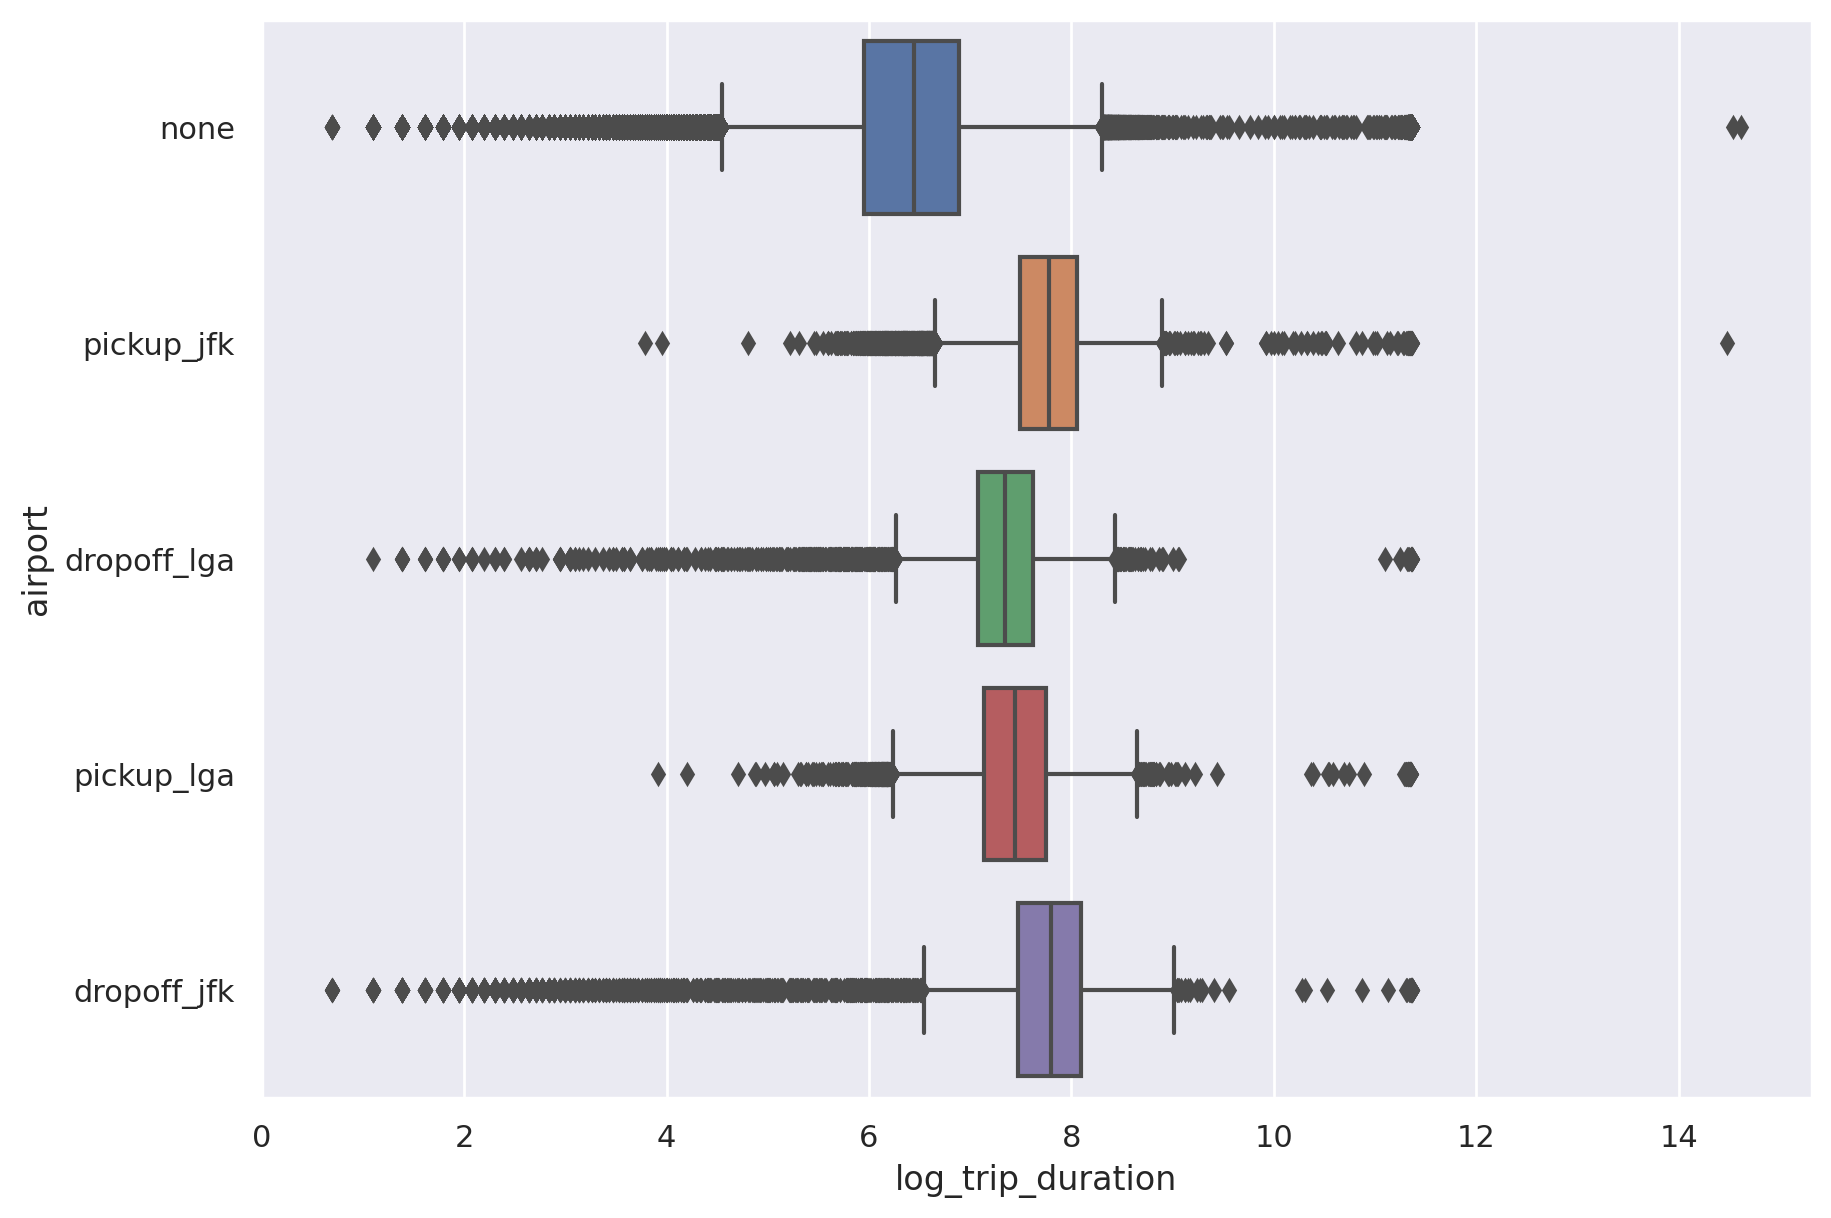

In [135]:
X_train['airport'] = 'none'
X_train.loc[X_train['pickup_jfk'] == 1, 'airport'] = 'pickup_jfk'
X_train.loc[X_train['dropoff_jfk'] == 1, 'airport'] = 'dropoff_jfk'
X_train.loc[X_train['pickup_lga'] == 1, 'airport'] = 'pickup_lga'
X_train.loc[X_train['dropoff_lga'] == 1, 'airport'] = 'dropoff_lga'
sns.boxplot(y=X_train['airport'], x=y_train)
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Скорее всего, поскольку мы видим, что поездки связанные с аэропортами длятся дольше, чем обычные поездки

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [136]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, rows, columns):
        self.rows = rows
        self.columns = columns
        self.longitude_ma = -73.93740
        self.longitude_mi = -74.01863
        self.latitude_ma = 40.79774
        self.latitude_mi = 40.70823
        self.latitude_d = (self.latitude_ma - self.latitude_mi) / rows
        self.longitude_d = (self.longitude_ma - self.longitude_mi) / columns


    def show_map(self):
        location = ((self.latitude_ma + self.latitude_mi) / 2, (self.longitude_ma + self.longitude_mi) / 2)
        m = folium.Map(location=location)
        for i in range(self.rows + 1):
            folium.PolyLine([(self.latitude_mi + self.latitude_d * i, self.longitude_mi),
                             (self.latitude_mi + self.latitude_d * i, self.longitude_ma)],
                            color='red').add_to(m)
        for i in range(self.columns + 1):
            folium.PolyLine([(self.latitude_mi, self.longitude_mi + self.longitude_d * i),
                             (self.latitude_ma, self.longitude_mi + self.longitude_d * i)],
                            color='red').add_to(m)
        return m


    def fit(self, X=None, y=None):
        return self

    def transform(self, X, y=None):
        trans = X.copy()
        trans['pickup_zone'] = -1
        trans.loc[(trans['pickup_latitude'] > self.latitude_mi) & (trans['pickup_latitude'] < self.latitude_ma) &
                  (trans['pickup_longitude'] > self.longitude_mi) & (trans['pickup_longitude'] < self.longitude_ma),
                  'pickup_zone'] = (((trans['pickup_latitude'] - self.latitude_mi) // self.latitude_d) * self.columns
                                    + ((trans['pickup_longitude'] - self.longitude_mi) // self.longitude_d))
        trans['dropoff_zone'] = -1
        trans.loc[(trans['dropoff_latitude'] > self.latitude_mi) & (trans['dropoff_latitude'] < self.latitude_ma) &
                  (trans['dropoff_longitude'] > self.longitude_mi) & (trans['dropoff_longitude'] < self.longitude_ma),
                  'dropoff_zone'] = (((trans['dropoff_latitude'] - self.latitude_mi) // self.latitude_d) * self.columns
                                    + ((trans['dropoff_longitude'] - self.longitude_mi) // self.longitude_d))
        return trans

In [137]:
# Поскольку в рамках этого дз этот трансформер мы будем использовать только для этого датасета, то предлагаю его
# просто добавить отдельным признаком
mgt = MapGridTransformer(4, 3)
X_train = mgt.transform(X_train)
X_test = mgt.transform(X_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [138]:
X_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_date', 'day_of_week', 'hour', 'month', 'day_of_year',
       'is_abnormal1', 'is_abnormal2', 'haversine', 'log_haversine',
       'is_traffic_jams_period', 'is_no_traffic_period', 'pickup_jfk',
       'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'airport', 'pickup_zone',
       'dropoff_zone'],
      dtype='object')

In [139]:
features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal1', 'is_abnormal2',
            'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period', 'pickup_jfk',
            'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'pickup_zone', 'dropoff_zone']

X_train_features = X_train[features]
X_test_features = X_test[features]

numeric_features = ['hour', 'day_of_year', 'log_haversine']
categorical_features = ['day_of_week', 'month', 'is_abnormal1', 'is_abnormal2', 'is_traffic_jams_period', 'is_no_traffic_period',
                        'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'dropoff_zone', 'pickup_zone']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)
y_train_pred = model.predict(X_train_features)

rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmsle for test = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle_train)

rmsle for test =  0.48130157842038623
rmsle for train =  0.4810069054388673


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**:
vendor_id - Наверное да, у разных вендоров могут быть нацелены на разные категории людей, в них могут быть разные автомобильные марки, водители могут различаться квалификацией.

passenger_count - Наверное да, я(и мне кажется не только я) часто заказываю такси с несколькими точками, чтобы высадить всех на более менее удобном месте + группы людей могут ездить к большие расстояния(к примеру семья в загородный дом).

store_and_fwd_flag - хз, наверное нет

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [140]:
print('Колво значений vendor_id:', X_train['vendor_id'].value_counts().shape[0])
print('Колво значений passenger_count:', X_train['passenger_count'].value_counts().shape[0])
print('Колво значений store_and_fwd_flag:', X_train['store_and_fwd_flag'].value_counts().shape[0])

Колво значений vendor_id: 2
Колво значений passenger_count: 9
Колво значений store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

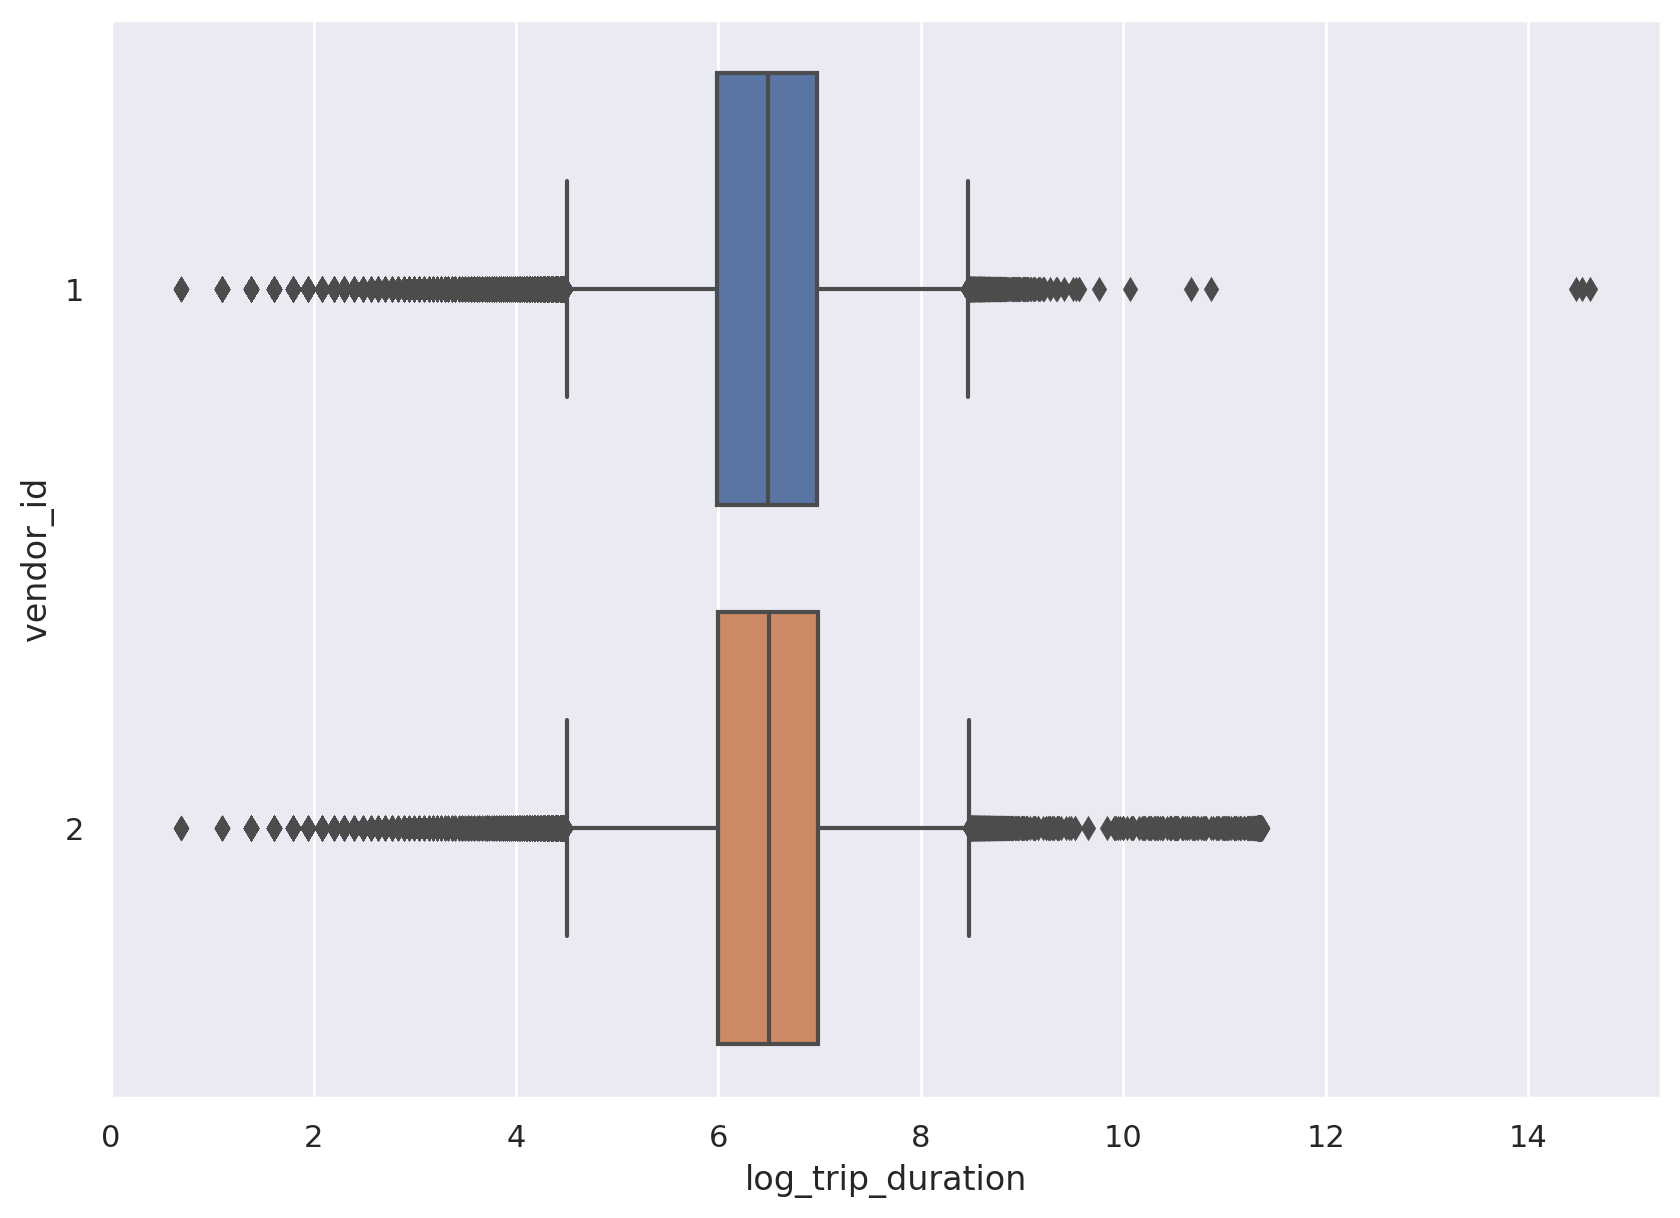

In [141]:
sns.boxplot(y=X_train['vendor_id'], x=y_train, orient='h')
plt.show()

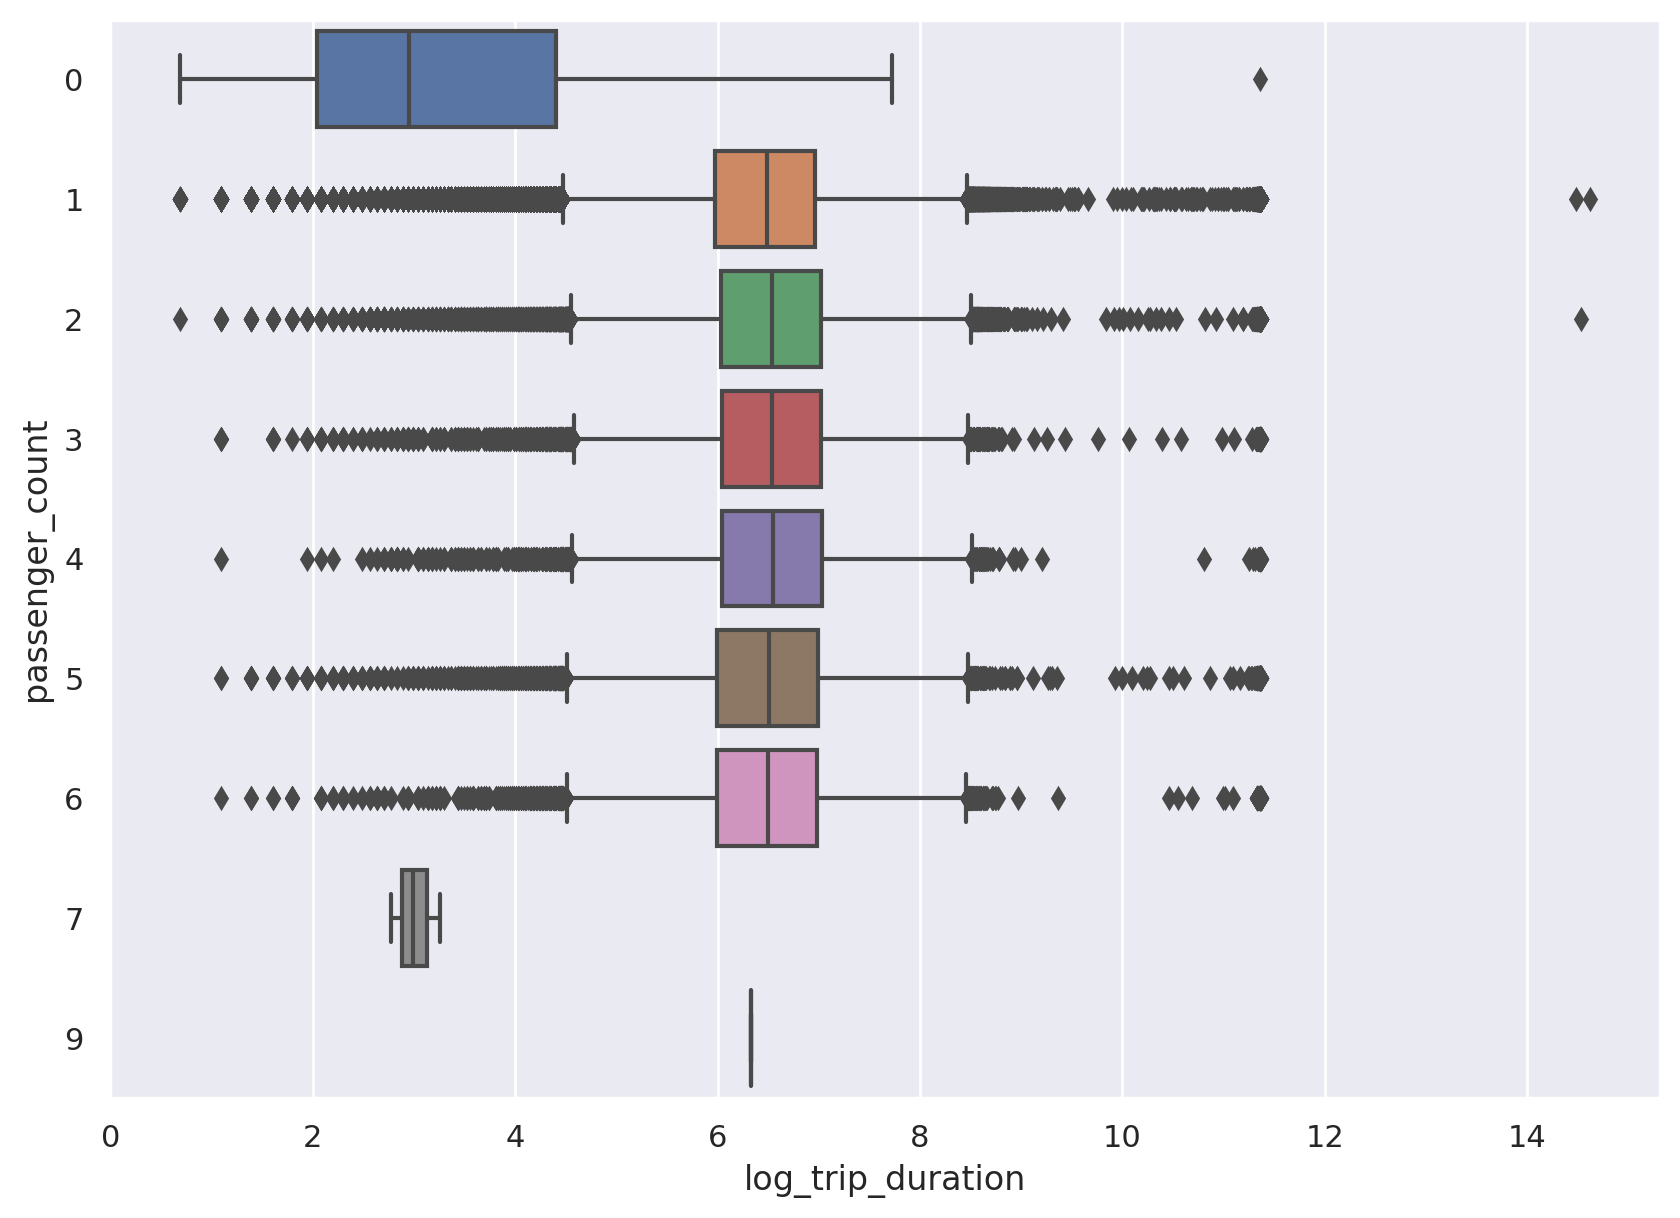

In [142]:
sns.boxplot(y=X_train['passenger_count'], x=y_train, orient='h')
plt.show()

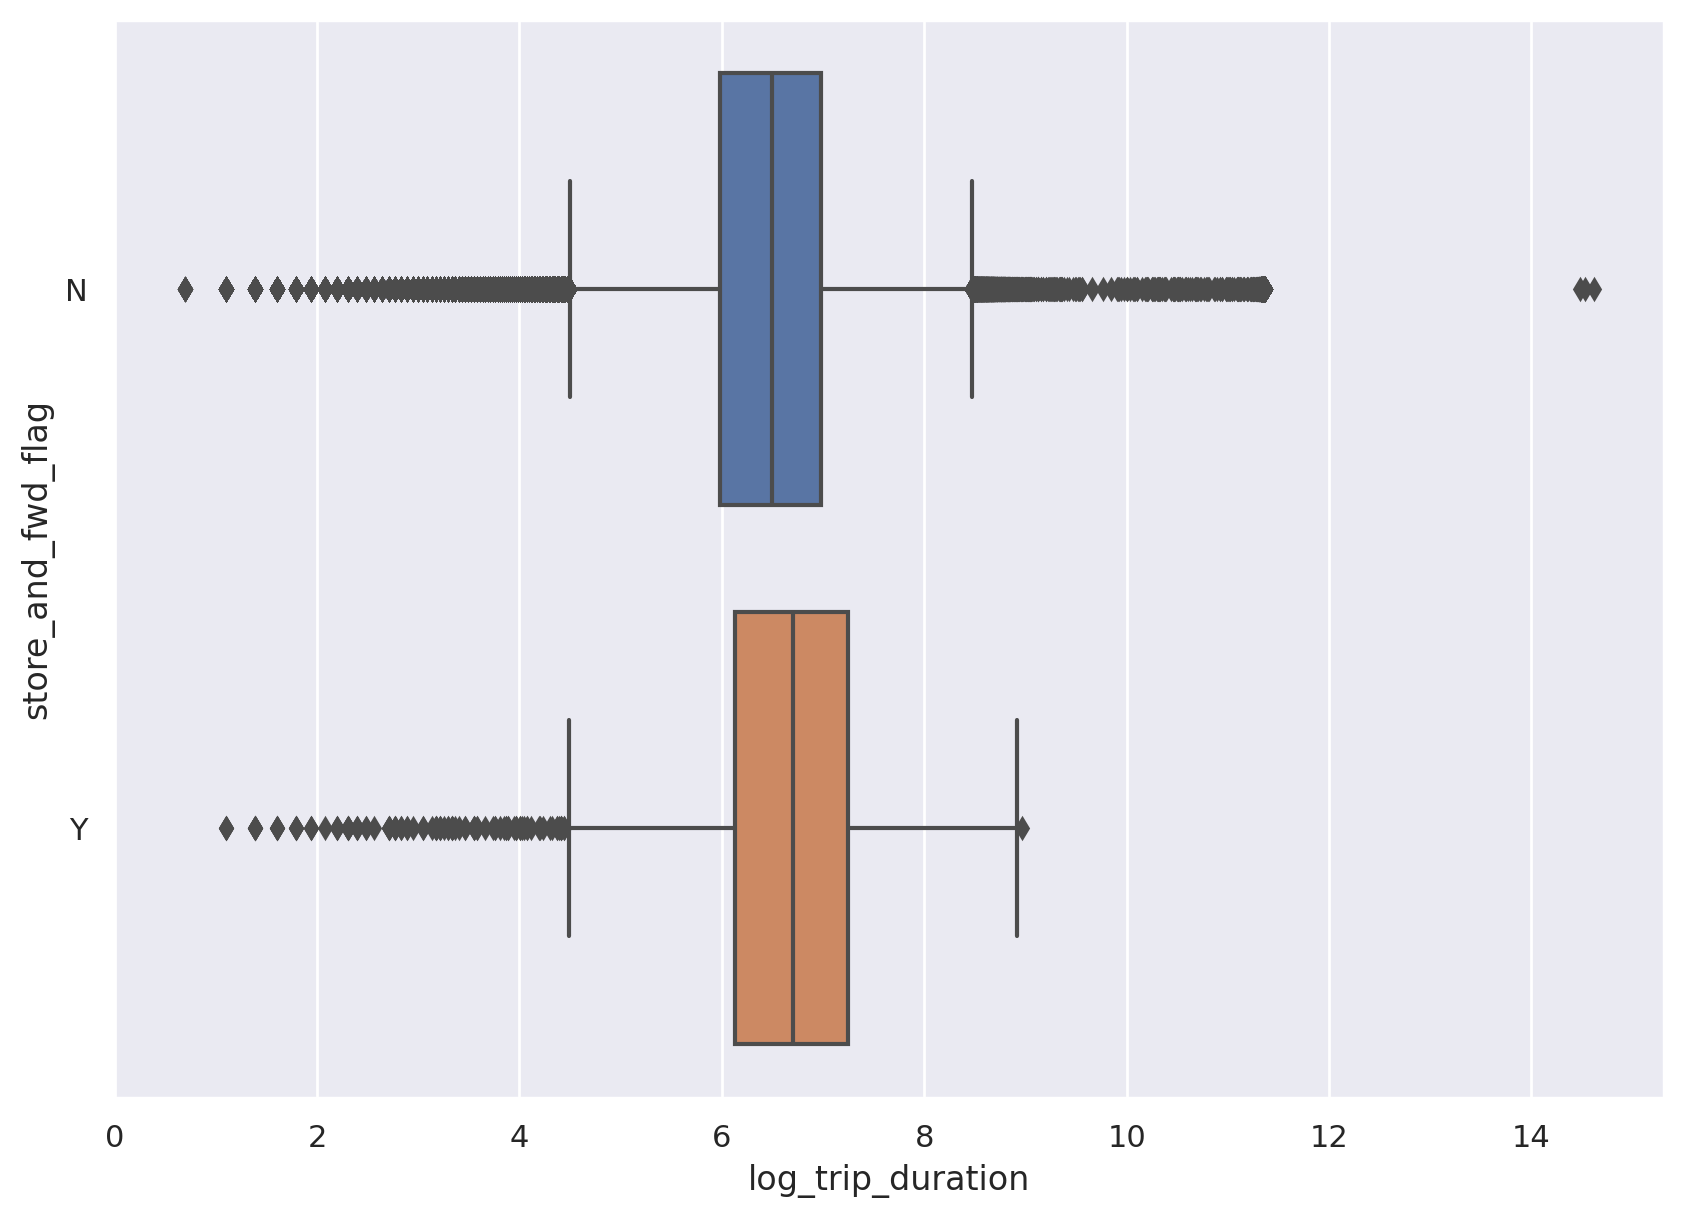

In [143]:
sns.boxplot(y=X_train['store_and_fwd_flag'], x=y_train, orient='h')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [144]:
X_train.loc[X_train['vendor_id'] == 2, 'vendor_id'] = 0
X_train.loc[X_train['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
X_train.loc[X_train['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1

X_test.loc[X_test['vendor_id'] == 2, 'vendor_id'] = 0
X_test.loc[X_test['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
X_test.loc[X_test['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: vendor_id и store_and_fwd_flag - почти не различаются. Небольшие различия есть только в passenger_count - возможно он будет както влиять.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [145]:
features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal1', 'is_abnormal2',
            'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period', 'pickup_jfk',
            'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'pickup_zone', 'dropoff_zone', 'vendor_id',
            'passenger_count', 'store_and_fwd_flag']

X_train_features = X_train[features]
X_test_features = X_test[features]

numeric_features = ['day_of_week', 'hour', 'day_of_year', 'log_haversine']
categorical_features = ['month', 'is_abnormal1', 'is_abnormal2', 'is_traffic_jams_period', 'is_no_traffic_period',
                        'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'dropoff_zone', 'pickup_zone',
                        'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)
y_train_pred = model.predict(X_train_features)

rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmsle for test = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle_train)

rmsle for test =  0.48176586921510184
rmsle for train =  0.4814515035796258


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [146]:
X_train = X_train.drop(columns=['vendor_id', 'store_and_fwd_flag'])

In [147]:
features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal1', 'is_abnormal2',
            'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period', 'pickup_jfk',
            'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'pickup_zone', 'dropoff_zone', 'passenger_count']

X_train_features = X_train[features]
X_test_features = X_test[features]

numeric_features = ['day_of_week', 'hour', 'day_of_year', 'log_haversine']
categorical_features = ['month', 'is_abnormal1', 'is_abnormal2', 'is_traffic_jams_period', 'is_no_traffic_period',
                        'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'dropoff_zone', 'pickup_zone',
                        'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)
y_train_pred = model.predict(X_train_features)

rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmsle for test = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle_train)

rmsle for test =  0.48176586921510184
rmsle for train =  0.4814515035796258


## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [148]:
X_train['log_trip_duration'] = y_train
X_train['prediction'] = y_train_pred

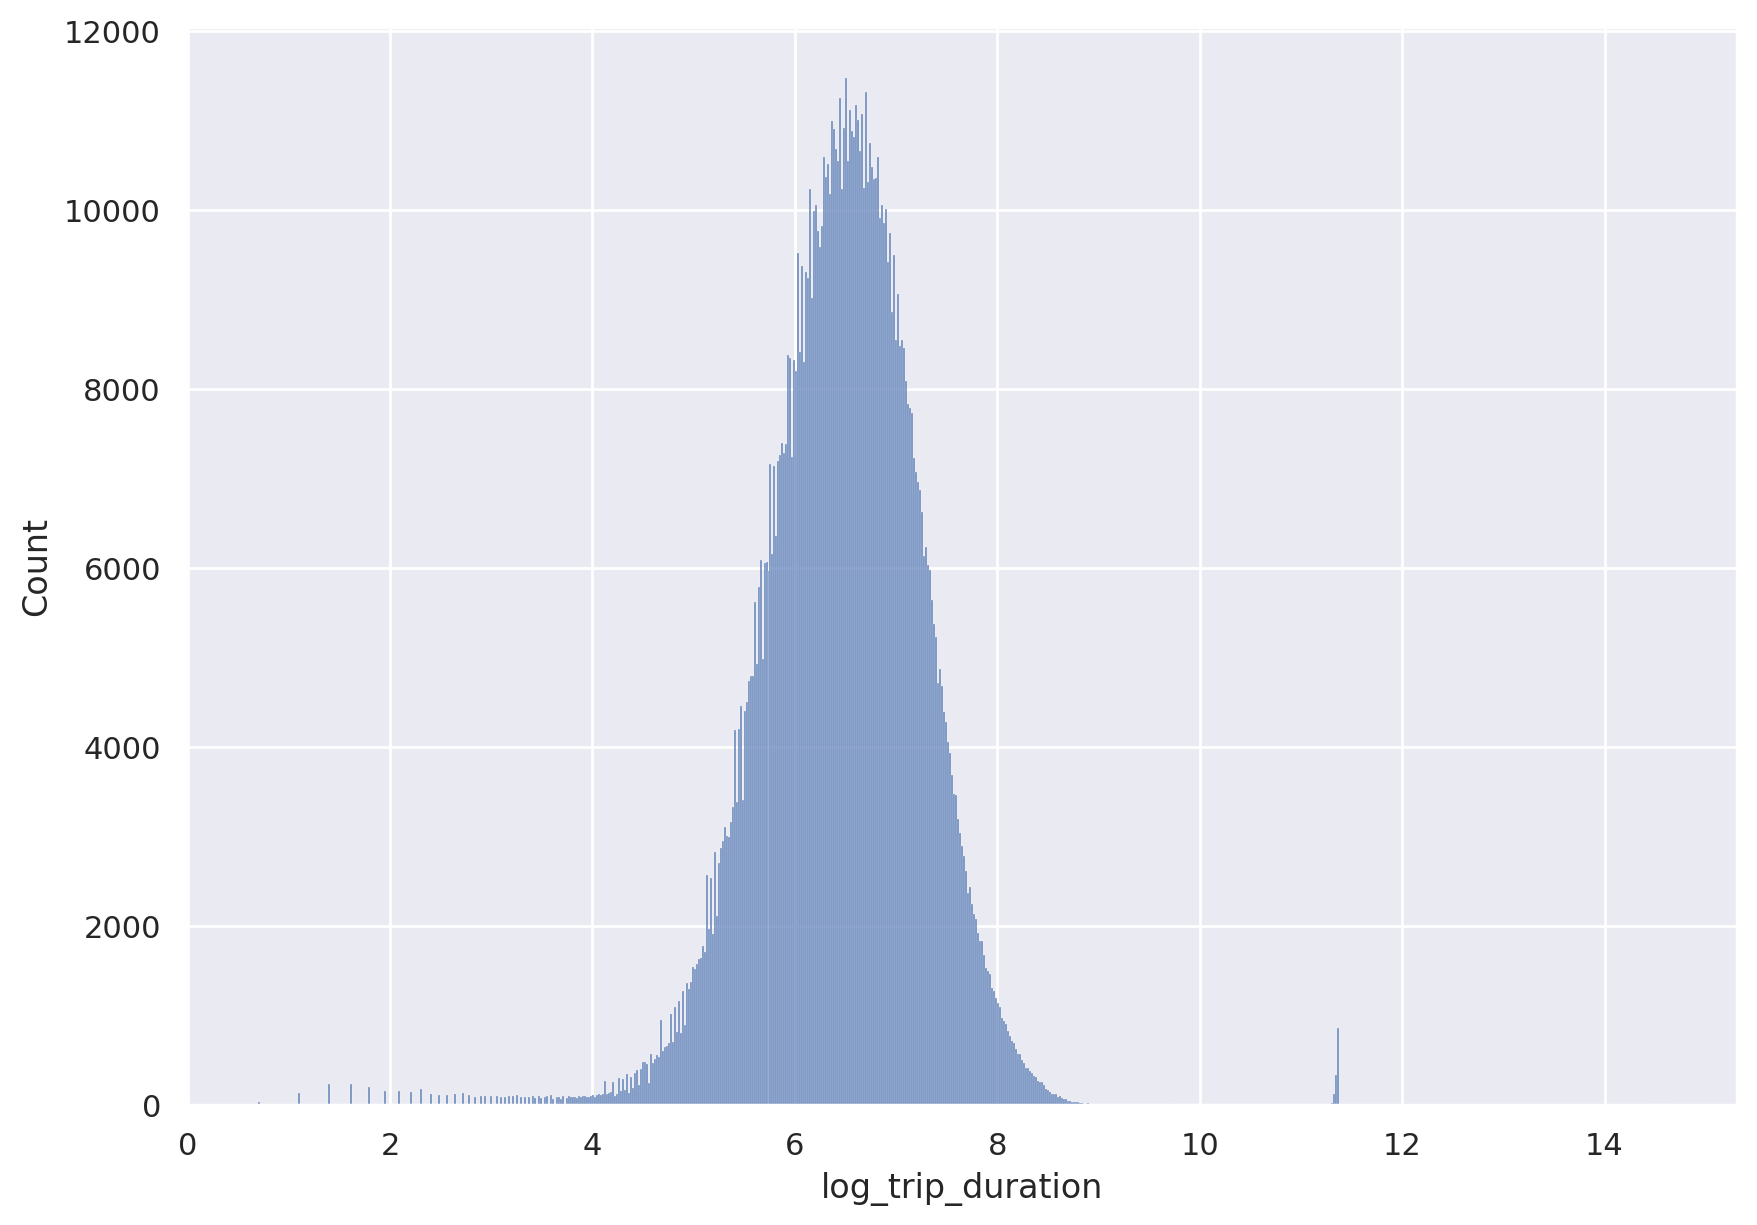

In [149]:
sns.histplot(X_train['log_trip_duration'])
plt.show()

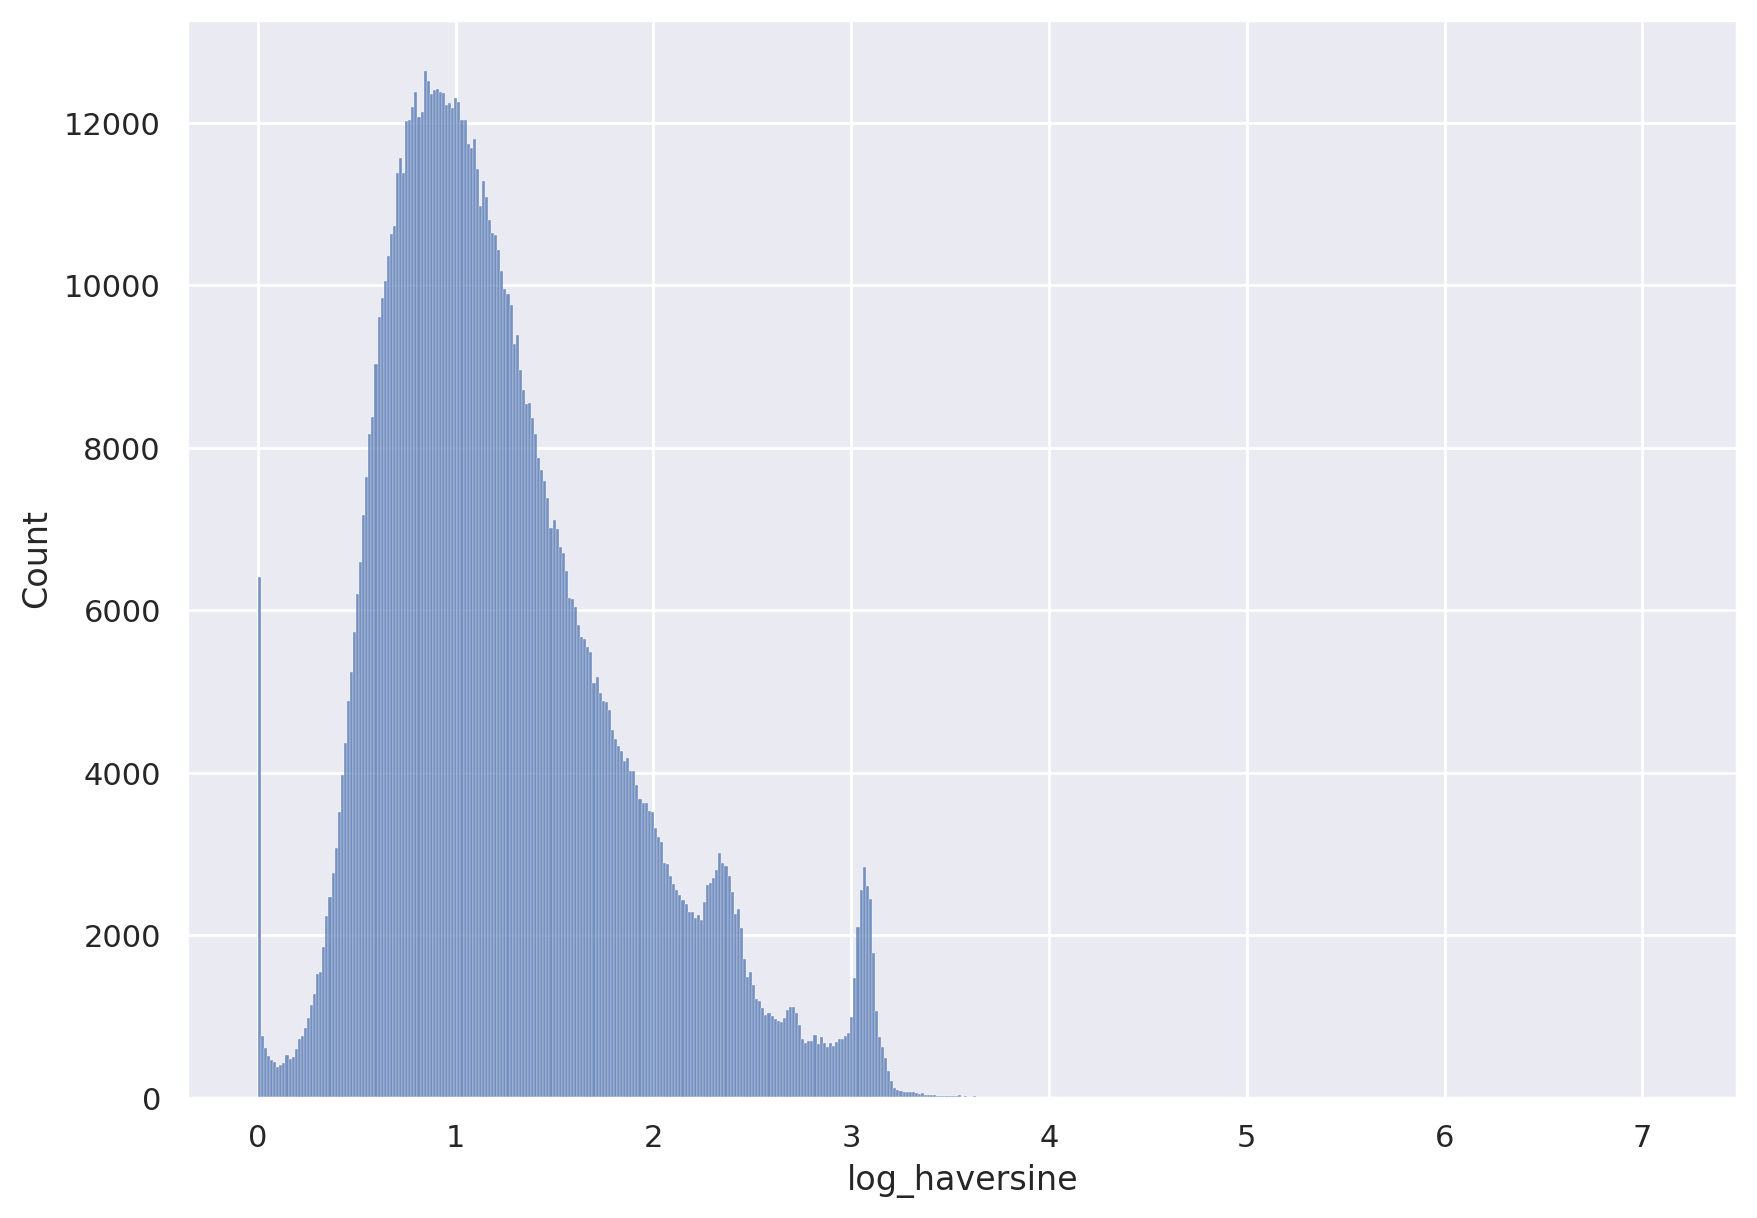

In [150]:
sns.histplot(X_train['log_haversine'])
plt.show()

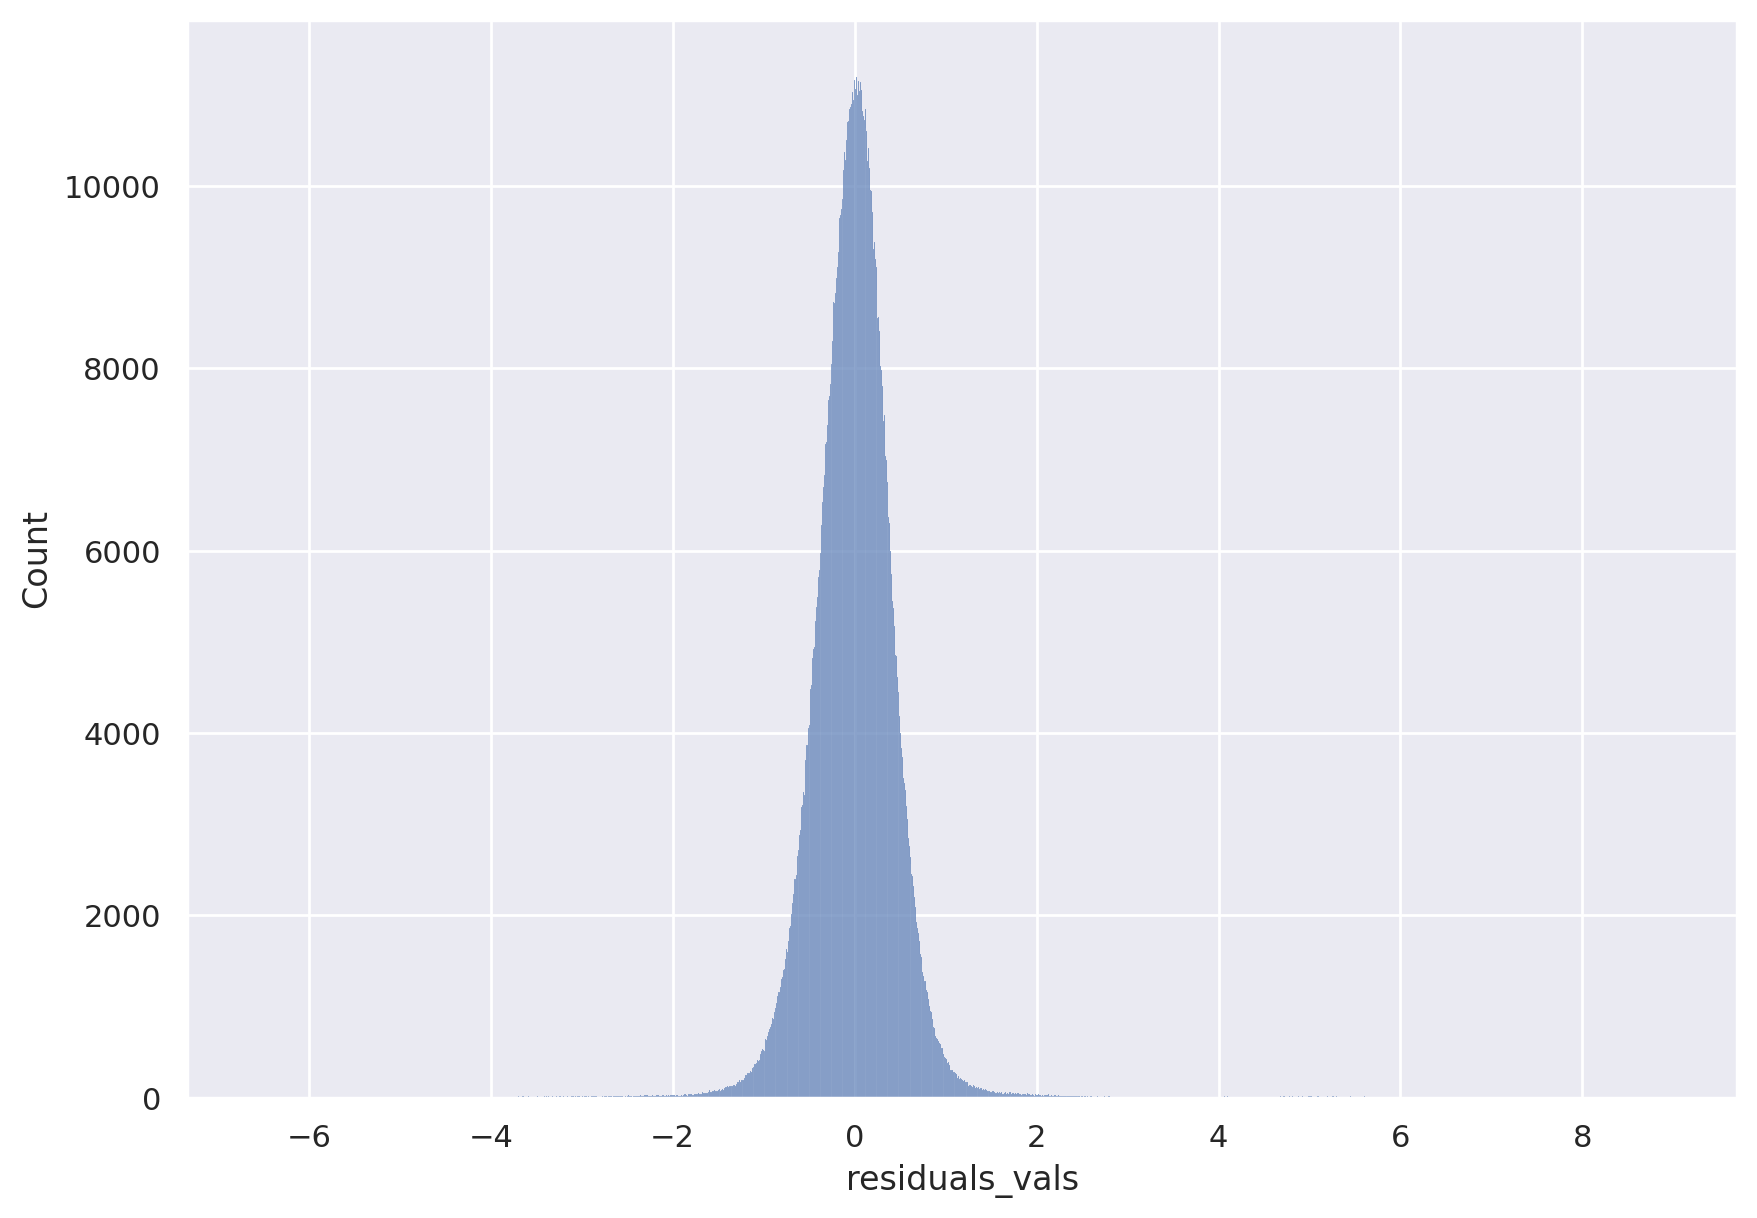

In [151]:
X_train['residuals_vals'] = X_train['log_trip_duration'] - X_train['prediction']
sns.histplot(X_train['residuals_vals'])
plt.show()

In [152]:
X_train = X_train.loc[(X_train['residuals_vals'] >= -3.5) & (X_train['residuals_vals'] <= 3.5)]
X_train = X_train.loc[(X_train['log_haversine'] > 0) & (X_train['log_haversine'] <= 4.5)]
X_train = X_train.loc[(X_train['log_trip_duration'] >= 2) & (X_train['log_trip_duration']  <= 10)]

In [154]:
features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal1', 'is_abnormal2',
            'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period', 'pickup_jfk',
            'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'pickup_zone', 'dropoff_zone', 'passenger_count']

X_train_features = X_train[features]
X_test_features = X_test[features]

numeric_features = ['day_of_week', 'hour', 'day_of_year', 'log_haversine']
categorical_features = ['month', 'is_abnormal1', 'is_abnormal2', 'is_traffic_jams_period', 'is_no_traffic_period',
                        'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'dropoff_zone', 'pickup_zone',
                        'passenger_count']
features_to_ohe = ['month', 'dropoff_zone', 'pickup_zone', 'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), features_to_ohe),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(X_train_features, X_train['log_trip_duration'])
y_pred = model.predict(X_test_features)
y_train_pred = model.predict(X_train_features)

rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmsle for test = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(X_train['log_trip_duration'], y_train_pred))
print('rmsle for train = ', rmsle_train)

rmsle for test =  0.5074125874609957
rmsle for train =  0.4508842065406776


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

Рассмотрим все категориальные признаки, которые у нас есть:

'month', 'is_traffic_jams_period', 'is_no_traffic_period', 'pickup_zone', 'dropoff_zone' - все группы имеют примерно одинаковые

'is_abnormal1', 'is_abnormal2', 'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'passenger_count' - проверим эти признаки.

Причем, если я правильно понимаю, то можно обьединять категории, которые имеют примерное одинаковые значения целевой переменной

In [155]:
print("Всего элементов: ", X_train.shape[0],
      "; Среднее значение ", X_train['log_trip_duration'].mean())

print("Всего элементов is_abnormal1: ", X_train[X_train['is_abnormal1']].shape[0],
      "; Среднее значение ", X_train[X_train['is_abnormal1']]['log_trip_duration'].mean())

print("Всего элементов is_abnormal2: ", X_train[X_train['is_abnormal2']].shape[0],
      "; Среднее значение ", X_train[X_train['is_abnormal2']]['log_trip_duration'].mean())

print("Всего элементов pickup_jfk: ", X_train[X_train['pickup_jfk']].shape[0],
      "; Среднее значение ", X_train[X_train['pickup_jfk']]['log_trip_duration'].mean())

print("Всего элементов dropoff_jfk: ", X_train[X_train['dropoff_jfk']].shape[0],
      "; Среднее значение ", X_train[X_train['dropoff_jfk']]['log_trip_duration'].mean())

print("Всего элементов pickup_lga: ", X_train[X_train['pickup_lga']].shape[0],
      "; Среднее значение ", X_train[X_train['pickup_lga']]['log_trip_duration'].mean())

print("Всего элементов dropoff_lga: ", X_train[X_train['dropoff_lga']].shape[0],
      "; Среднее значение ", X_train[X_train['dropoff_lga']]['log_trip_duration'].mean())

for pas_count in range(10):
    print("Всего элементов c passenger_count =", pas_count, ": ", X_train[X_train['passenger_count'] == pas_count].shape[0],
          "; Среднее значение ", X_train[X_train['passenger_count'] == pas_count]['log_trip_duration'].mean())


Всего элементов:  1014814 ; Среднее значение  6.467949927915645
Всего элементов is_abnormal1:  3444 ; Среднее значение  6.418881127524008
Всего элементов is_abnormal2:  8364 ; Среднее значение  6.358545572749045
Всего элементов pickup_jfk:  21858 ; Среднее значение  7.628789404311486
Всего элементов dropoff_jfk:  8436 ; Среднее значение  7.561845084841119
Всего элементов pickup_lga:  25713 ; Среднее значение  7.402737989276841
Всего элементов dropoff_lga:  10954 ; Среднее значение  7.311063805361867
Всего элементов c passenger_count = 0 :  28 ; Среднее значение  4.225949171994443
Всего элементов c passenger_count = 1 :  719106 ; Среднее значение  6.453508074154898
Всего элементов c passenger_count = 2 :  146108 ; Среднее значение  6.513369328292722
Всего элементов c passenger_count = 3 :  41721 ; Среднее значение  6.516127392847745
Всего элементов c passenger_count = 4 :  19770 ; Среднее значение  6.522690878992237
Всего элементов c passenger_count = 5 :  54377 ; Среднее значение  6.48

Кажется можно обьединить группы pickup и dropoff(каждого из аэропортов) и группы аномальных периодов.
Passenger_count = {0, 7} лучше не обьединять, поскольку у них сильно различаются значения.
Passenger_count = {1, ..., 6} лучше не обьединять, поскольку это очень большие группы.


In [156]:
X_train['is_abnormal'] = 0
X_train.loc[(X_train['is_abnormal1']) | (X_train['is_abnormal2']), 'is_abnormal'] = 1
X_train['jfk'] = 0
X_train.loc[(X_train['pickup_jfk']) | (X_train['dropoff_jfk']), 'jfk'] = 1
X_train['lga'] = 0
X_train.loc[(X_train['pickup_lga']) | (X_train['dropoff_lga']), 'jfk'] = 1
X_train['is_abnormal'] = 0
X_test.loc[(X_test['is_abnormal1']) | (X_test['is_abnormal2']), 'is_abnormal'] = 1
X_test['jfk'] = 0
X_test.loc[(X_test['pickup_jfk']) | (X_test['dropoff_jfk']), 'jfk'] = 1
X_test['lga'] = 0
X_test.loc[(X_test['pickup_lga']) | (X_test['dropoff_lga']), 'jfk'] = 1


In [157]:
y_train = X_train['log_trip_duration']
X_train.drop(columns=['residuals_vals', 'log_trip_duration', 'prediction'], inplace=True)

In [158]:
features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal',
            'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period', 'jfk',
            'lga', 'pickup_zone', 'dropoff_zone', 'passenger_count']

X_train_features = X_train[features]
X_test_features = X_test[features]

numeric_features = ['hour', 'day_of_year', 'log_haversine']
categorical_features = ['day_of_week', 'month', 'is_abnormal', 'is_traffic_jams_period', 'is_no_traffic_period',
                        'jfk', 'lga', 'dropoff_zone', 'pickup_zone', 'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


model = pipeline.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)
y_train_pred = model.predict(X_train_features)

rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmsle for test = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle_train)

rmsle for test =  0.4830346016514673
rmsle for train =  0.42425712950582917


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [159]:
print("До кодирования: ", len(categorical_features))

X_train_features = X_train_features[categorical_features]
encoder = OneHotEncoder()
X_train_features_en = encoder.fit_transform(X_train_features)

print("После кодирования: ", X_train_features_en.shape[1])

До кодирования:  10
После кодирования:  55


In [160]:
categorical_features = ['day_of_week', 'month', 'dropoff_zone', 'pickup_zone', 'passenger_count']
print("До кодирования: ", len(categorical_features))

X_train_features = X_train_features[categorical_features]
encoder = OneHotEncoder()
X_train_features_en = encoder.fit_transform(X_train_features)

print("После кодирования: ", X_train_features_en.shape[1])

До кодирования:  5
После кодирования:  47


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [161]:
from sklearn.linear_model import Lasso

features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal',
            'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period', 'jfk',
            'lga', 'pickup_zone', 'dropoff_zone', 'passenger_count']

X_train_features = X_train[features]
X_test_features = X_test[features]

numeric_features = ['hour', 'day_of_year', 'log_haversine']
categorical_features = ['day_of_week', 'month', 'is_abnormal', 'is_traffic_jams_period', 'is_no_traffic_period',
                        'jfk', 'lga', 'dropoff_zone', 'pickup_zone', 'passenger_count']

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])


model = pipeline.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)
y_train_pred = model.predict(X_train_features)

rmsle = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmsle for test = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle_train)

rmsle for test =  0.796409836089466
rmsle for train =  0.7537622680695779


лассо хуже


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [162]:
print(X_train.shape)
print(y_train.shape)

(1014814, 29)
(1014814,)


In [163]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
print(X_train.shape)
print(y_train.shape)

(811851, 29)
(811851,)


In [164]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)

searcher_ridge = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)

X_val_features = X_val[features]
X_train_features = X_train[features]

searcher_ridge.fit(X_val_features, y_val)
best_alpha = searcher_ridge.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = pipeline.fit(X_train_features, y_train)
y_train_pred = model.predict(X_train_features)
y_val_pred = model.predict(X_val_features)

rmsle = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_val, y_val_pred))
print('rmsle for val = ', rmsle_train)

Best alpha = 1.2743
rmsle for train =  0.42454570143728576
rmsle for val =  0.42312857622440286


In [167]:
alphas = np.logspace(-2, 3, 20)

searcher_lasso = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)


searcher_lasso.fit(X_val_features, y_val)
best_alpha = searcher_lasso.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train_features, y_train)
y_train_pred = model.predict(X_train_features)
y_val_pred = model.predict(X_val_features)
y_test_pred = model.predict(X_test_features)

rmsle = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_val, y_val_pred))
print('rmsle for val = ', rmsle_train)

rmsle_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('rmsle for test = ', rmsle_test)

Best alpha = 0.0100
rmsle for train =  0.44099768508717446
rmsle for val =  0.439792320829298
rmsle for test =  0.498415404020086


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [168]:
alphas = np.logspace(-2, 3, 20)

num_zeros = []
not_zeros = []


for alpha in alphas:
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha))
    ])
    model = pipeline.fit(X_val_features, y_val)
    num_zeros.append(np.sum(pipeline.steps[-1][-1].coef_ == 0))
    not_zeros.append(np.sum(pipeline.steps[-1][-1].coef_ != 0))

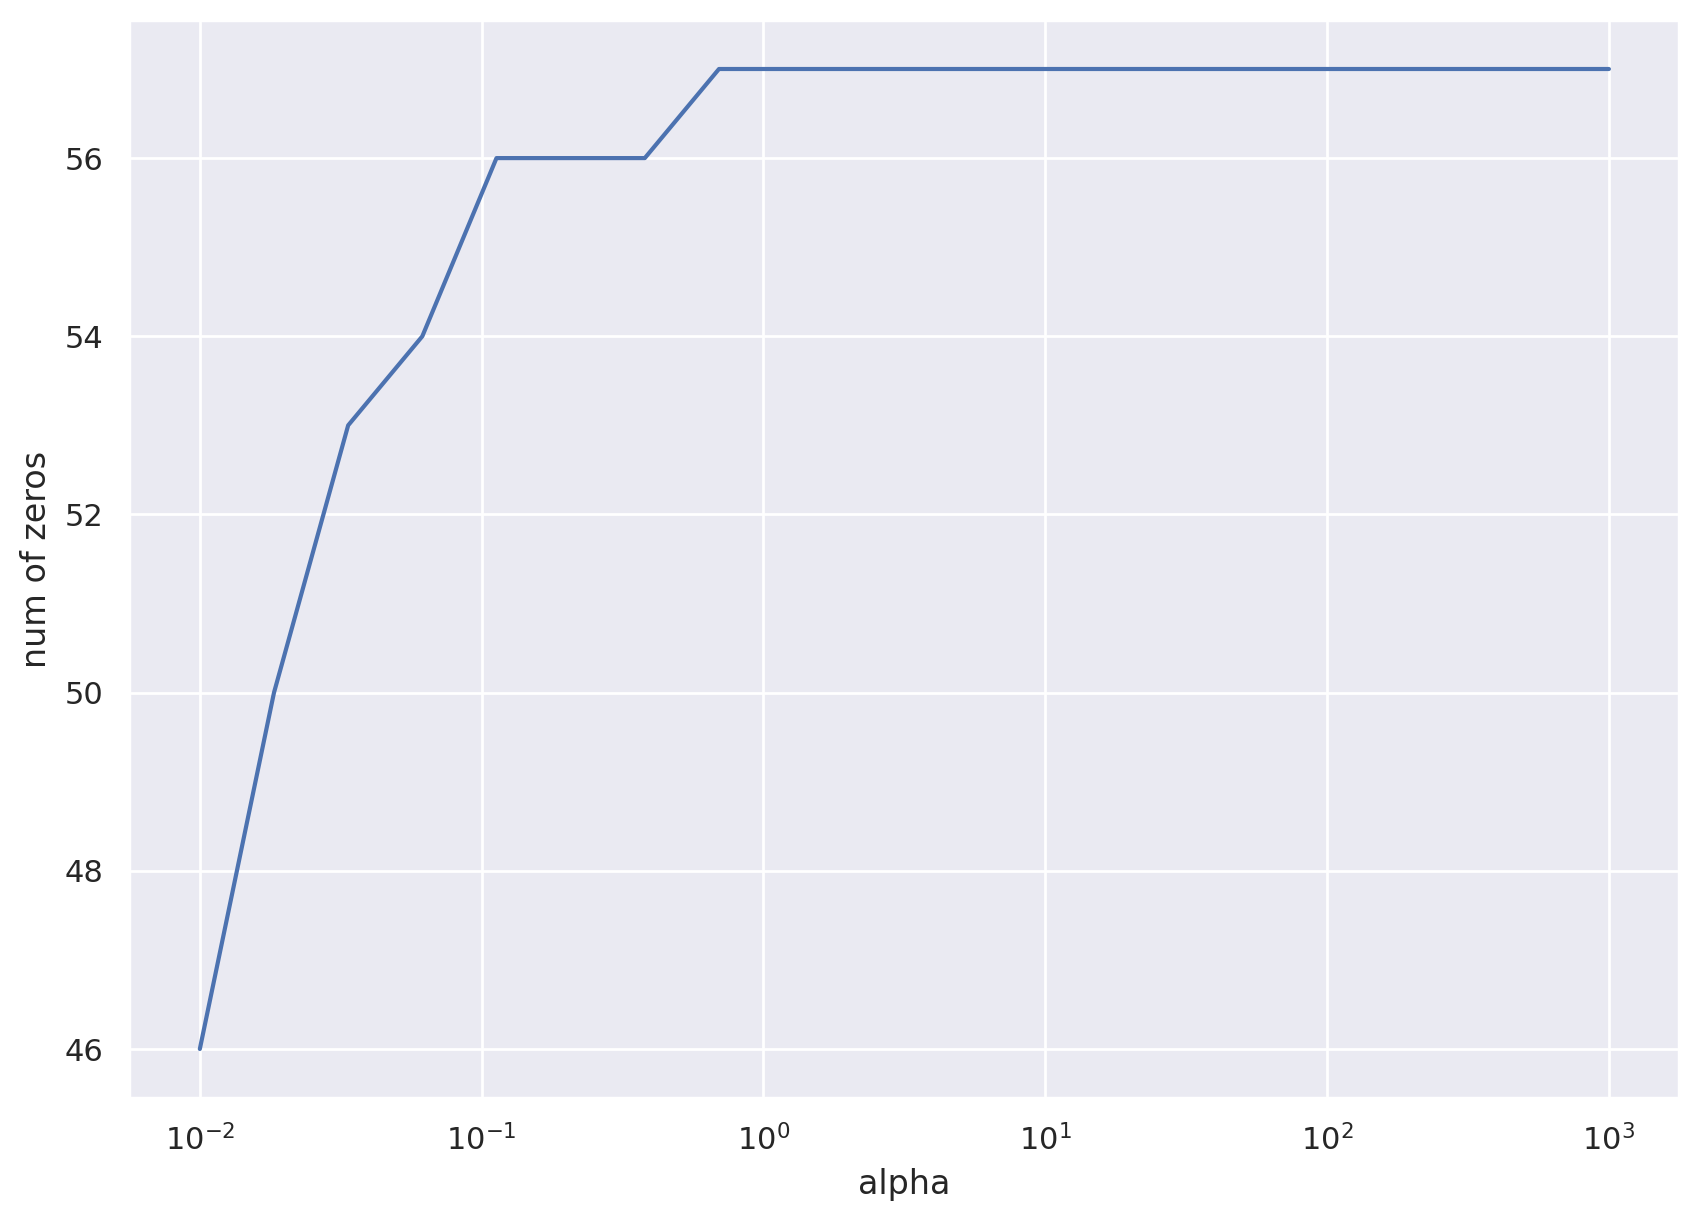

In [169]:
plt.plot(alphas, num_zeros)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("num of zeros")
plt.show()

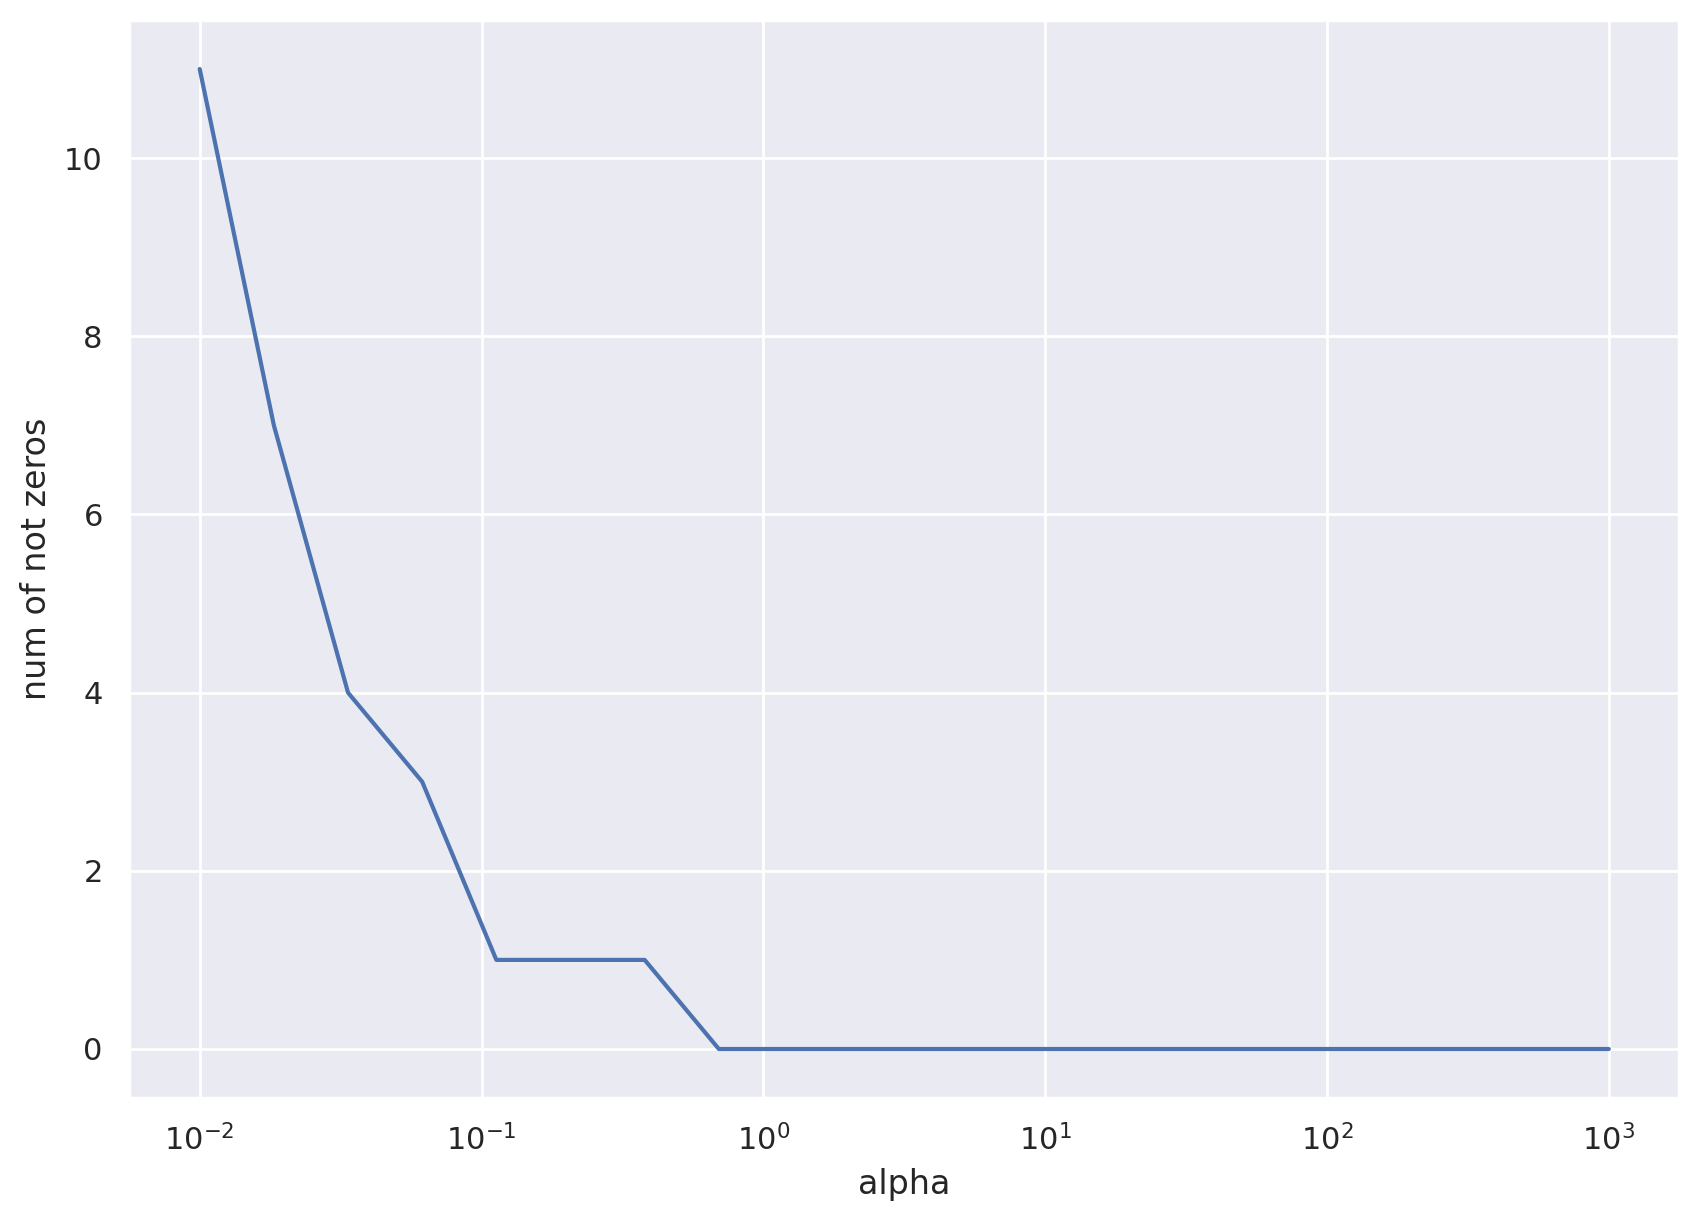

In [170]:
plt.plot(alphas, not_zeros)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("num of not zeros")
plt.show()

In [175]:
# давайте возьмем alpha = 0.01
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(0.01))
])
model = pipeline.fit(X_train_features, y_train)
y_test_pred = model.predict(X_test_features)

rmsle = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle)



rmsle for train =  0.41430954327748615


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?


**Ответ**: Признак выделяет самые частые "маршруты" => могут быть пробки. Поэтому этот признак можно воспринимать как 'is_traffic_jams_period', но привязанный к координатам.

In [172]:
X_train.columns

Index(['id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'pickup_date', 'day_of_week', 'hour', 'month',
       'day_of_year', 'is_abnormal1', 'is_abnormal2', 'haversine',
       'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period',
       'pickup_jfk', 'dropoff_jfk', 'pickup_lga', 'dropoff_lga', 'airport',
       'pickup_zone', 'dropoff_zone', 'is_abnormal', 'jfk', 'lga'],
      dtype='object')

In [173]:
routes = X_train.groupby(['pickup_zone', 'dropoff_zone']).agg({'id': 'count'}).reset_index()
routes = routes.loc[(routes['pickup_zone'] != -1) & (routes['dropoff_zone'] != -1)]
routes.sort_values(by=['id'], inplace=True, ascending=False)
X_train['popular_route'] = -1

i = 100
for _, row in routes.iterrows():
    if i == 0:
        break
    pickup_zone = row['pickup_zone']
    dropoff_zone = row['dropoff_zone']
    X_train.loc[(X_train['pickup_zone'] == pickup_zone) & (X_train['dropoff_zone'] == dropoff_zone),
                'popular_route'] = i
    X_val.loc[(X_val['pickup_zone'] == pickup_zone) & (X_val['dropoff_zone'] == dropoff_zone),
              'popular_route'] = i
    X_test.loc[(X_test['pickup_zone'] == pickup_zone) & (X_test['dropoff_zone'] == dropoff_zone),
               'popular_route'] = i
    i -= 1

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [174]:
features = ['day_of_week', 'hour', 'month', 'day_of_year', 'is_abnormal',
            'log_haversine', 'is_traffic_jams_period', 'is_no_traffic_period', 'jfk',
            'lga', 'pickup_zone', 'dropoff_zone', 'passenger_count', 'popular_route']

X_val_features = X_val[features]
X_train_features = X_train[features]
X_test_features = X_test[features]


numeric_features = ['hour', 'day_of_year', 'log_haversine']
categorical_features = ['day_of_week', 'month', 'is_abnormal', 'is_traffic_jams_period', 'is_no_traffic_period',
                        'jfk', 'lga', 'dropoff_zone', 'pickup_zone', 'passenger_count', 'popular_route']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(1.2743))
])

model = pipeline.fit(X_train_features, y_train)
y_train_pred = model.predict(X_train_features)
y_val_pred = model.predict(X_val_features)
y_test_pred = model.predict(X_test_features)

rmsle = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('rmsle for train = ', rmsle)

rmsle_train = np.sqrt(mean_squared_error(y_val, y_val_pred))
print('rmsle for val = ', rmsle_train)

rmsle_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('rmsle for test = ', rmsle_test)

rmsle for train =  0.41430954327748615
rmsle for val =  0.4160647483344677
rmsle for test =  0.47635416991253515


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.